**Student Name:** Saroj Devkota  
**University ID:** 232955  
**Group:** L6CG6  
**Module Leader:** Mr. Siman Giri  
**Module Tutor:** Mr. Shiv Kumar Yadav


#Assessment I - Image Classification with Convolutional Neural Network

## Part A: Implementing Convolutional Neural Network

### Libraries Installation and imports

In [ ]:
!pip install numpy matplotlib seaborn scikit-learn pillow tensorflow

In [ ]:
import os
import random
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2


### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading dataset

In [ ]:
train_dir = '/content/drive/MyDrive/CNN/archive/Car_Brand_Logos/Train'
test_dir = '/content/drive/MyDrive/CNN/archive/Car_Brand_Logos/Test'

###  What does the dataset represent?
The dataset contains images of car brand logos categorized into 8 classes: **Hyundai**, **Lexus**, **Mazda**, **Mercedes**, **Opel**, **Skoda**, **Toyota**, and **Volkswagen**. It was created by **Volkan Özdemir** and is available on [Kaggle](https://www.kaggle.com/datasets/volkandl/car-brand-logos/code).

---

###  How many total images are in the dataset?
The dataset contains a total of **2,913 images**.

---

###  What is the distribution of images across different classes?
The number of images in each class is as follows:

- Hyundai: **302** images  
- Lexus: **301** images  
- Mazda: **317** images  
- Mercedes: **342** images  
- Opel: **301** images  
- Skoda: **314** images  
- Toyota: **306** images  
- Volkswagen: **330** images

This relatively even distribution helps ensure that the model trains fairly across all classes.

---

###  How is the dataset split into training and validation sets? Justify your choice.
The dataset is split into **80% training** and **20% validation**. This is a widely used strategy that allows the model to learn from most of the data while using a smaller portion to validate its performance on unseen examples, helping to prevent overfitting.

---

###  What preprocessing techniques (e.g., resizing, normalization) were applied?

1. **Resizing:**  
   All images were resized to a fixed dimension using the `target_size` parameter in the `flow_from_directory()` function to maintain consistency across inputs.

2. **Normalization:**  
   Pixel values were rescaled from the range [0, 255] to [0, 1] using `rescale=1./255` for both training and test datasets. This normalization helps speed up convergence during training.

---

###  What data generators, if any, were used for preprocessing and augmentation?

The **ImageDataGenerator** class was used for image preprocessing and augmentation:

- **For training and validation sets:**
  - Rescaling
  - Augmentation parameters:
    - `rotation_range=10`
    - `width_shift_range=0.05`
    - `height_shift_range=0.05`
    - `zoom_range=0.05`
    - `horizontal_flip=True`
  - A validation split of 20% was applied using `validation_split=0.2` and accessed via `subset="training"` and `subset="validation"`.

- **For the test set:**
  - Only rescaling was applied; no augmentation was used to ensure unbiased evaluation.

---

###  If data augmentation was applied, provide visualizations of sample augmented images.
Sample images showing the effects of the applied data augmentation techniques are included in the **Data Augmentation and Distribution** section below to illustrate the variety introduced during training.


This code counts the number of image files in each class folder within a given directory. It does this by first creating an empty dictionary to store the image counts. Then, it loops through each item in the specified directory and checks if it is a folder, which represents a class (e.g., Hyundai, Lexus, etc.).

For each class folder, it looks for files that end with common image extensions like `.png`, `.jpg`, or `.jpeg` (case-insensitive). It counts the number of such image files and stores the count in the dictionary with the class name as the key.

Finally, it returns the dictionary showing how many images are available for each class in the dataset. This is useful for understanding the class distribution in image classification tasks.


In [ ]:
def count_images_per_class(data_dir):
    image_counts = {}
    for class_label in os.listdir(data_dir):
        class_folder = os.path.join(data_dir, class_label)
        if os.path.isdir(class_folder):
            images = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            image_counts[class_label] = len(images)
    return image_counts


The code calls the `count_images_per_class` function twice: once for the training data (`train_dir`) and once for the test data (`test_dir`).

1. **`train_image_counts = count_images_per_class(train_dir)`**:  
   This line counts the number of images in each class folder within the training dataset directory (`train_dir`) and stores the result in the `train_image_counts` dictionary. The dictionary will have class labels as keys and the respective number of images in that class as values.

2. **`test_image_counts = count_images_per_class(test_dir)`**:  
   Similarly, this line counts the number of images in each class folder within the test dataset directory (`test_dir`) and stores the result in the `test_image_counts` dictionary.

These two lines are used to get the distribution of images in both the training and testing datasets, which can be helpful for analyzing the balance of the data in each dataset.


In [ ]:
train_image_counts = count_images_per_class(train_dir)
test_image_counts = count_images_per_class(test_dir)


The code calculates and prints the total number of images in both the training and test datasets, while also providing a breakdown of the image count for each class.

1. **Initialization:**  
   Two variables, `total_train_images` and `total_test_images`, are initialized to `0`. These will store the total image counts for the training and test datasets, respectively.

2. **Training Images Count:**  
   - The code then prints the header "Training Images" and "Classes".
   - It loops through each class in `train_image_counts`, a dictionary containing the number of images per class in the training set.
   - For each class, it adds the image count to `total_train_images` and prints the class name along with its image count.

3. **Test Images Count:**  
   - Similarly, the code prints "Test Images" and "Classes".
   - It loops through each class in `test_image_counts` (the dictionary of image counts for the test set), adds the image count to `total_test_images`, and prints the class name along with the count.

4. **Total Counts:**  
   - After looping through all classes, the code prints the total number of images in both the training and test datasets.
   - It also prints the overall total number of images by adding `total_train_images` and `total_test_images`.

This process helps to understand the distribution and size of each dataset (training and testing) and ensures that the data is being loaded and counted correctly.


In [ ]:
total_train_images = 0
total_test_images = 0

print("Training Images:")
print("Classes:")
for class_name, image_count in train_image_counts.items():
    total_train_images += image_count
    print(f"'{class_name}': {image_count} images")

print()
print("Test Images:")
print("Classes:")
for class_name, image_count in test_image_counts.items():
    total_test_images += image_count
    print(f"'{class_name}': {image_count} images")

print()
print(f"Total Training Images Count: {total_train_images}")
print(f"Total Test Images Count: {total_test_images}")
print(f"Total Images Count: {total_train_images + total_test_images}")


Training Images:
Classes:
'lexus': 301 images
'hyundai': 302 images
'mazda': 317 images
'mercedes': 342 images
'toyota': 306 images
'skoda': 314 images
'volkswagen': 330 images
'opel': 301 images

Test Images:
Classes:
'volkswagen': 50 images
'opel': 50 images
'hyundai': 50 images
'lexus': 50 images
'skoda': 50 images
'mazda': 50 images
'toyota': 50 images
'mercedes': 50 images

Total Training Images Count: 2513
Total Test Images Count: 400
Total Images Count: 2913


The code creates a **bar plot** to visualize the distribution of images per class in the training dataset using `matplotlib` and `seaborn`.

1. **Figure Setup:** Sets the plot size with `plt.figure(figsize=(12, 6))`.
2. **Prepare Data:** Extracts class names and image counts from `train_image_counts`.
3. **Color Palette:** Generates a unique color for each class using `sns.color_palette("viridis", len(class_names))`.
4. **Bar Plot:** Creates the bar plot using `sns.barplot()`, assigning class names to the x-axis and image counts to the y-axis.
5. **Labels & Styling:** Adds a title, axis labels, and rotates x-axis labels for better readability.
6. **Text on Bars:** Displays the image count above each bar for clarity.
7. **Layout Adjustment:** Uses `plt.tight_layout()` for proper spacing.
8. **Display Plot:** Finally, `plt.show()` displays the plot.

This plot helps to visualize the number of images across classes in the training dataset.


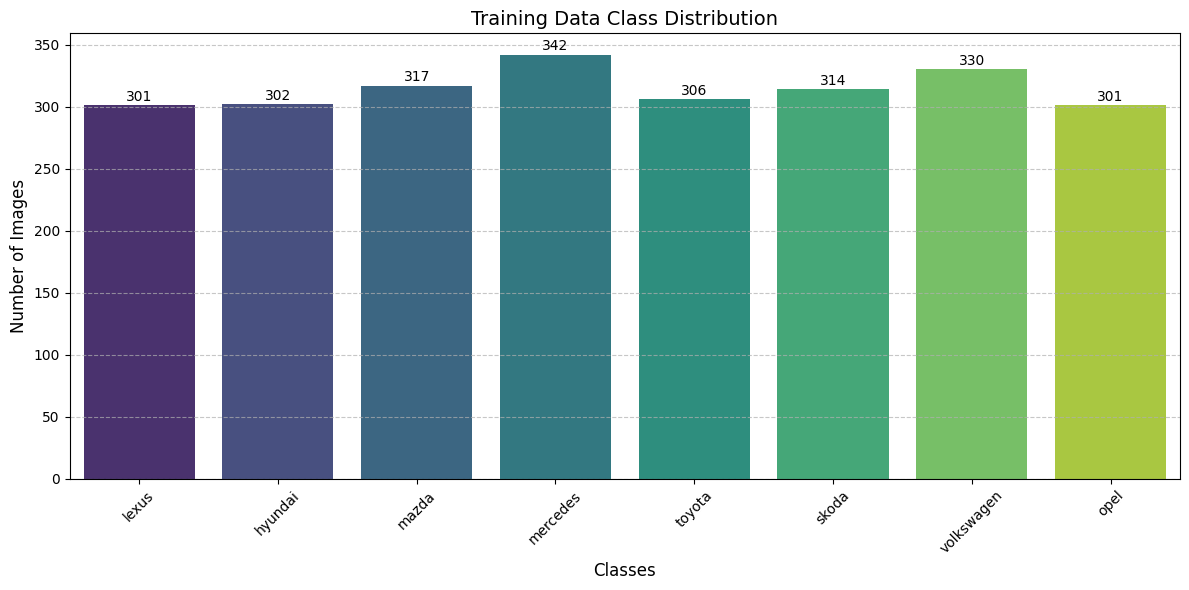

In [ ]:
plt.figure(figsize=(12, 6))


class_names = list(train_image_counts.keys())
image_counts = list(train_image_counts.values())


palette = sns.color_palette("viridis", len(class_names))

# Bar plot with proper hue assignment to avoid FutureWarning
sns.barplot(
    x=class_names,
    y=image_counts,
    hue=class_names,
    palette=palette,
    legend=False
)

plt.title('Training Data Class Distribution', fontsize=14)
plt.ylabel('Number of Images', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for idx, count in enumerate(image_counts):
    plt.text(idx, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The code creates a **bar plot** to visualize the distribution of images per class in the test dataset using `matplotlib` and `seaborn`.

1. **Figure Setup:** Sets the plot size with `plt.figure(figsize=(12, 6))` to ensure a clear and large plot.
2. **Prepare Data:** Extracts the class names (`test_class_names`) and the corresponding image counts (`test_image_counts_values`) from `test_image_counts`.
3. **Color Palette:** Creates a unique color for each class using the `"mako"` color palette (`sns.color_palette("mako", len(test_class_names))`).
4. **Bar Plot:** Creates the bar plot using `sns.barplot()`:
   - `x=test_class_names`: The x-axis represents the class names.
   - `y=test_image_counts_values`: The y-axis shows the number of images in each class.
   - `hue=test_class_names`: Colors the bars based on class names.
   - `palette=palette`: Applies the custom color palette.
   - `legend=False`: Disables the legend.
5. **Labels & Styling:** Adds a title, axis labels, and rotates the x-axis labels for better readability.
6. **Text on Bars:** The `for` loop adds the number of images as text above each bar for clarity.
7. **Layout Adjustment:** Uses `plt.tight_layout()` to adjust spacing for better visual alignment.
8. **Display Plot:** `plt.show()` displays the plot.

This plot visualizes the number of images per class in the test dataset.


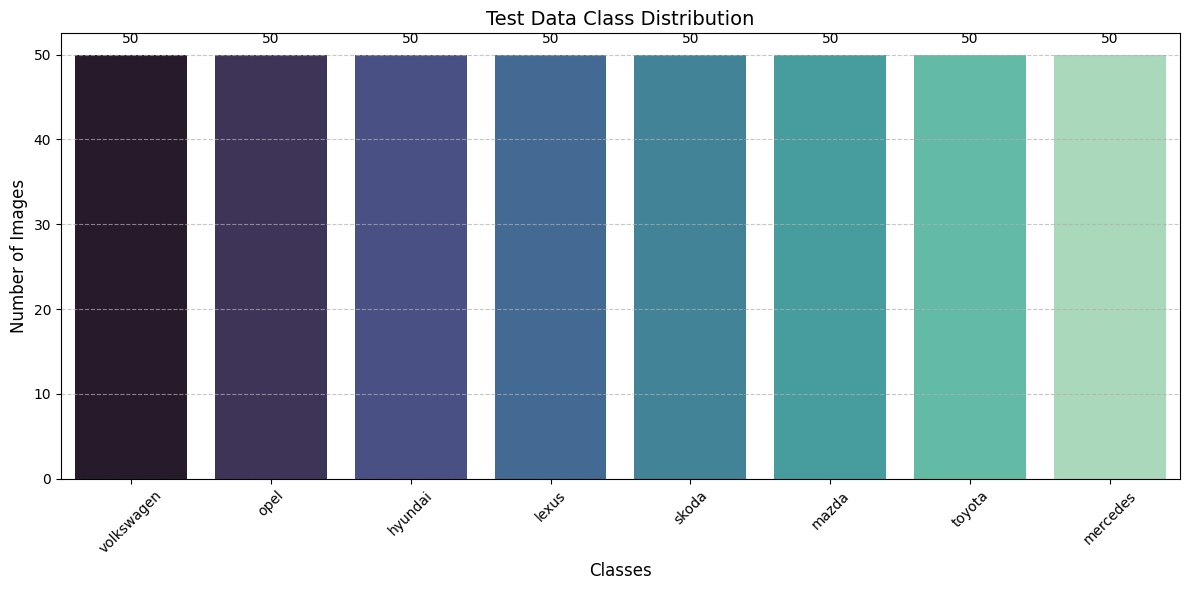

In [ ]:
plt.figure(figsize=(12, 6))


test_class_names = list(test_image_counts.keys())
test_image_counts_values = list(test_image_counts.values())


palette = sns.color_palette("mako", len(test_class_names))


sns.barplot(
    x=test_class_names,
    y=test_image_counts_values,
    hue=test_class_names,
    palette=palette,
    legend=False
)

plt.title('Test Data Class Distribution', fontsize=14)
plt.ylabel('Number of Images', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for idx, count in enumerate(test_image_counts_values):
    plt.text(idx, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The code visualizes a random sample of images from each class in the training dataset.

1. **Class Labels:**  
   - `train_class_labels = os.listdir(train_dir)`: Retrieves the list of class labels (i.e., subfolders) from the training dataset directory.

2. **Figure Setup:**  
   - `plt.figure(figsize=(3 * 3, len(train_class_labels) * 3))`: Creates a figure with a size proportional to the number of classes. Each row will contain 3 images per class.

3. **Looping Through Classes:**  
   - The code loops through each class in `train_class_labels`:
     - Retrieves the images for that class.
     - Randomly selects 3 images (or fewer if the class has less than 3 images).

4. **Displaying the Images:**  
   - The selected images are displayed in a grid using `plt.subplot()`. Each image is displayed in a subplot in a grid of size `len(train_class_labels) x 3`.
   - `plt.imshow(image_obj)` displays the image, and `plt.axis('off')` removes the axes for a cleaner view.
   - The class name is shown as the title only for the second image (`if jdx == 1`).

5. **Layout Adjustment:**  
   - `plt.tight_layout()` ensures that the subplots are neatly arranged without overlapping.

6. **Displaying the Plot:**  
   - `plt.show()` displays the final plot with the images.

This code helps visualize a small, random sample of images from each class to get a quick overview of the dataset.


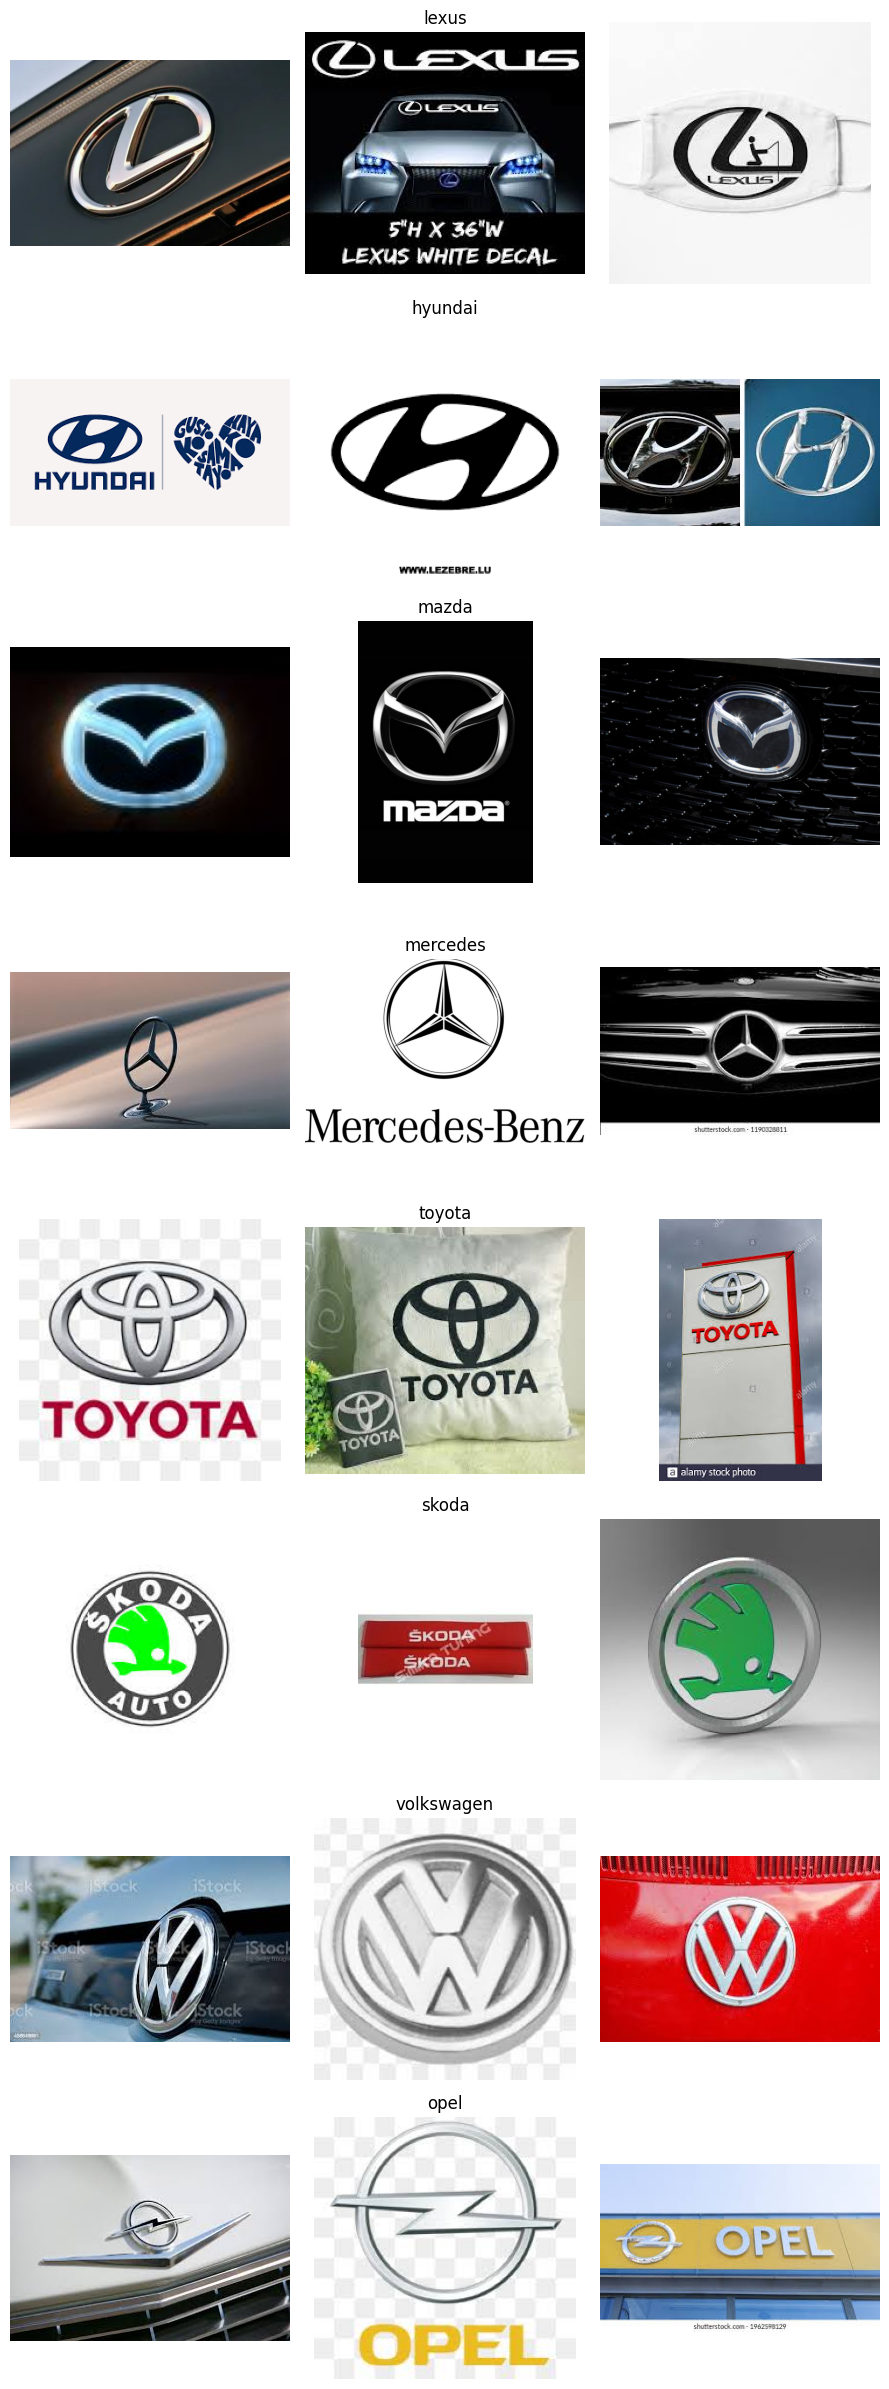

In [ ]:
train_class_labels = os.listdir(train_dir)
plt.figure(figsize=(3 * 3, len(train_class_labels) * 3))
for idx, label in enumerate(train_class_labels):
    label_path = os.path.join(train_dir, label)
    label_images = [img for img in os.listdir(label_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
    chosen_images = random.sample(label_images, min(3, len(label_images)))
    for jdx, image_name in enumerate(chosen_images):
        image_path = os.path.join(label_path, image_name)
        image_obj = Image.open(image_path).convert('RGB')
        plt.subplot(len(train_class_labels), 3, idx * 3 + jdx + 1)
        plt.imshow(image_obj)
        plt.axis('off')
        if jdx == 1:
            plt.title(label)
plt.tight_layout()
plt.show()


The function `clean_corrupted_images()` is designed to identify and remove corrupted images from a dataset.

1. **Function Setup:**  
   - The function takes one parameter `data_path`, which represents the root directory containing the dataset.

2. **Walking Through Directories:**  
   - `os.walk(data_path)` recursively traverses all subdirectories and files in the given `data_path`.

3. **Opening and Verifying Images:**  
   - For each file, the code tries to open the image using `Image.open(file_path)` and verifies it with `image.verify()`.
   - `verify()` checks if the image file is valid. If it’s corrupt or has invalid data, an exception is raised.

4. **Exception Handling:**  
   - If an `IOError` or `SyntaxError` is raised (indicating the image is corrupted), the image is removed using `os.remove(file_path)`, and a message is printed indicating the image has been deleted.
   - A counter `deleted_count` is incremented to keep track of how many images have been removed.

5. **Summary:**  
   - After the function has finished processing, it prints the total number of corrupted images removed.

This function is helpful for cleaning a dataset by removing corrupted images before further processing or training.


In [ ]:
def clean_corrupted_images(data_path):
    deleted_count = 0
    for folder, _, file_list in os.walk(data_path):
        for filename in file_list:
            file_path = os.path.join(folder, filename)
            try:
                image = Image.open(file_path)
                image.verify()
            except (IOError, SyntaxError):
                print(f"Removing corrupt image: {file_path}")
                os.remove(file_path)
                deleted_count += 1
    print(f"Total corrupt images removed: {deleted_count}")


The following code calls the `clean_corrupted_images()` function to remove corrupted images from both the training and test datasets.

1. **Removing Corrupted Images from Training Dataset:**
   - `clean_corrupted_images(train_dir)`: This line invokes the `clean_corrupted_images()` function on the `train_dir` directory, which contains the training dataset. It will check for and remove any corrupted images in the training dataset.

2. **Removing Corrupted Images from Test Dataset:**
   - `clean_corrupted_images(test_dir)`: Similarly, this line invokes the function on the `test_dir` directory, which contains the test dataset, removing any corrupted images found.

The function helps ensure that the datasets are free from corrupted images before proceeding with training or evaluation.


In [ ]:
clean_corrupted_images(train_dir)
clean_corrupted_images(test_dir)


Total corrupt images removed: 0
Total corrupt images removed: 0


The code defines a function `get_image_format_counts()` that counts the number of images in each format (e.g., JPEG, PNG, etc.) within a specified directory.

1. **Function Definition:**
   - The function `get_image_format_counts(directory_path)` accepts a directory path as its argument.
   - It initializes an empty dictionary `format_counts` to store the count of each image format.

2. **Directory Traversal:**  
   - Using `os.walk(directory_path)`, the function recursively walks through the directory and its subdirectories, retrieving each file.
   - For each file, it attempts to open it as an image using `Image.open()` from the `PIL` library.

3. **Format Extraction and Counting:**  
   - If the image is opened successfully, its format (e.g., PNG, JPEG) is accessed via `img_obj.format`.
   - The count for that image format is updated in the `format_counts` dictionary. If the format is not already in the dictionary, it is added with a count of 1.

4. **Error Handling:**  
   - If an error occurs while opening an image (e.g., the file is not a valid image), the function catches the exception and simply continues to the next file.

5. **Return Value:**  
   - The function returns the `format_counts` dictionary, which contains the count of each image format found in the directory.

6. **Usage:**
   - `train_image_formats = get_image_format_counts(train_dir)`: This retrieves the image format counts for the training dataset directory (`train_dir`).
   - `test_image_formats = get_image_format_counts(test_dir)`: Similarly, this retrieves the image format counts for the test dataset directory (`test_dir`).

7. **Output:**
   - The function prints the format counts for both the training and test datasets.

This code is useful for checking the distribution of image formats in the datasets to ensure they are consistent and valid for further processing.


In [ ]:
import os
from PIL import Image

def get_image_format_counts(directory_path):
    format_counts = {}
    for current_root, _, file_names in os.walk(directory_path):
        for file_name in file_names:
            try:
                with Image.open(os.path.join(current_root, file_name)) as img_obj:
                    image_format = img_obj.format
                    format_counts[image_format] = format_counts.get(image_format, 0) + 1
            except:
                continue
    return format_counts

# Usage
train_image_formats = get_image_format_counts(train_dir)
test_image_formats = get_image_format_counts(test_dir)

print("Training formats:", train_image_formats)
print("Validation formats:", test_image_formats)


Training formats: {'JPEG': 2256, 'PNG': 246, 'WEBP': 11}
Validation formats: {'JPEG': 369, 'PNG': 30, 'WEBP': 1}


The code defines a function `extract_image_dimensions()` that extracts the dimensions (width and height) of images within a specified directory. It then prints the minimum, maximum, and mean dimensions of the images in the training dataset.

1. **Function Definition:**  
   - `extract_image_dimensions(directory)` takes a directory path as input and initializes two lists, `width_list` and `height_list`, to store the dimensions of images. It also initializes a counter `total_images` to keep track of the number of processed images.

2. **Directory Traversal:**  
   - The code walks through all subdirectories and files in the specified directory (`os.walk(directory)`).
   - For each image file (with extensions `.jpg`, `.jpeg`, or `.png`), it tries to open the image using `Image.open(file_path)`.

3. **Extracting Dimensions:**  
   - If the image is opened successfully, its dimensions (width and height) are extracted using `image_obj.size`, and the width and height are added to their respective lists.

4. **Error Handling:**  
   - If an error occurs while processing an image (e.g., a corrupted image), the code prints an error message and continues with the next image.

5. **Returning Results:**  
   - After processing all images, the function returns the width and height lists as NumPy arrays. If no images are processed, it returns empty arrays and prints a message.

6. **Extracting Image Dimensions for Training Data:**  
   - `image_widths, image_heights = extract_image_dimensions(train_dir)`: This line calls the function on the training dataset (`train_dir`) to extract the image dimensions.

7. **Calculating and Printing Statistics:**  
   - If valid image sizes are found, the code prints the minimum, maximum, and mean width and height of the images.
   - If no valid images are found, it prints a message indicating that no image sizes were found.

This code helps in understanding the distribution of image dimensions in the dataset, which can be useful for further processing or resizing images.


In [ ]:
import os
from PIL import Image
import numpy as np

def extract_image_dimensions(directory):
    width_list, height_list = [], []
    total_images = 0
    for subdir, _, file_list in os.walk(directory):
        for filename in file_list:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(subdir, filename)
                try:
                    with Image.open(file_path) as image_obj:
                        width, height = image_obj.size
                        width_list.append(width)
                        height_list.append(height)
                    total_images += 1
                except Exception as error:
                    print(f"Error processing file {filename}: {error}")

    if total_images == 0:
        print("No images were processed.")
        return np.array([]), np.array([])

    return np.array(width_list), np.array(height_list)

image_widths, image_heights = extract_image_dimensions(train_dir)

if image_widths.size > 0 and image_heights.size > 0:
    print(f"Widths:  min={image_widths.min()}, max={image_widths.max()}, mean={image_widths.mean():.1f}")
    print(f"Heights: min={image_heights.min()}, max={image_heights.max()}, mean={image_heights.mean():.1f}")
else:
    print("No valid image sizes were found.")


Widths:  min=64, max=6000, mean=533.2
Heights: min=64, max=4000, mean=404.1


The following code defines important parameters for image preprocessing and model training:

1. **`targetSize = (224, 224)`**:  
   This specifies the target size to which all images will be resized. The images will be resized to 224x224 pixels, which is a common input size for many pre-trained deep learning models (such as VGG16, ResNet, etc.).

2. **`batch_size = 16`**:  
   This defines the number of images to be processed in each batch during training. A batch size of 16 means that 16 images will be passed through the model at once during training and validation.

3. **`num_classes = 8`**:  
   This specifies the number of output classes for the classification task. In this case, the dataset contains 8 classes, which correspond to different car brand logos.

4. **`validation_split = 0.2`**:  
   This indicates that 20% of the data will be reserved for validation, while the remaining 80% will be used for training. The validation set is used to evaluate the model’s performance on unseen data during training.

These parameters are typically used when setting up data generators and configuring the training process in deep learning models.


In [ ]:
targetSize = (224, 224) #Target Size for resizing
batch_size = 16
num_classes = 8
validation_split = 0.2 #20% for validation

The code sets up the `train_datagen` object using Keras' `ImageDataGenerator`, which is used for image preprocessing and augmentation during training.

1. **Normalization (rescale = 1./255):**  
   - `rescale = 1./255`: This line normalizes the pixel values of the images from the range of 0-255 (standard RGB values) to a range of 0-1. This helps in speeding up the convergence of the model during training.

2. **Data Augmentation:**
   - `rotation_range = 10`: The image will be randomly rotated by up to 10 degrees, helping the model become more invariant to slight rotations.
   - `width_shift_range = 0.05`: The image can be shifted horizontally by a factor of 5% of the image width, introducing variability in horizontal positioning.
   - `height_shift_range = 0.05`: The image can be shifted vertically by a factor of 5% of the image height, introducing variability in vertical positioning.
   - `zoom_range = 0.05`: The image will be zoomed in or out randomly by up to 5%, helping the model generalize better across various zoom levels.
   - `horizontal_flip = True`: The image can be flipped horizontally, which is particularly useful for augmenting symmetry in images (e.g., logos or objects).

3. **Validation Split:**
   - `validation_split = 0.2`: 20% of the data is reserved for validation, which will be used to evaluate the model's performance on unseen data during training.

4. **Purpose of Data Augmentation:**
   - Data augmentation is applied only to the **training dataset**. It helps create variations of the training images, making the model more robust and less likely to overfit by artificially increasing the diversity of the data.

This setup is useful for preparing the training data for the deep learning model and improving its ability to generalize.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, # we're normalizing here from 0 to 1 (range of rgb values 1 to 255)
    rotation_range = 10,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    zoom_range = 0.05,
    horizontal_flip = True,
    validation_split = 0.2 ##20% of the data will be used for validation
)

#data augmentation is performed only for the training dataset


The code sets up data generators for the training and validation datasets using the `ImageDataGenerator`'s `flow_from_directory` method.

1. **Training Data Generator (`train_loader`):**
   - `train_loader = train_datagen.flow_from_directory(...)`: This line creates a data generator for the training dataset.
     - `train_dir`: Specifies the directory containing the training images.
     - `target_size=targetSize`: Resizes all images to the target size `(224, 224)`.
     - `batch_size=batch_size`: Sets the batch size to 16, meaning 16 images are processed at a time.
     - `class_mode='sparse'`: Specifies that the class labels are integers (e.g., for classification tasks). This is used for sparse categorical cross-entropy loss.
     - `shuffle=True`: Shuffles the images before each epoch to help with training generalization.
     - `seed=123`: Ensures that the shuffling is done in a reproducible manner.
     - `subset="training"`: Specifies that this generator will provide the training subset of the dataset (80% of the data).

2. **Validation Data Generator (`val_loader`):**
   - `val_loader = train_datagen.flow_from_directory(...)`: This line creates a data generator for the validation dataset.
     - The arguments are similar to the training data generator, but with the following differences:
     - `shuffle=False`: Validation data should not be shuffled to ensure that the validation set is consistent for evaluation.
     - `subset="validation"`: Specifies that this generator will provide the validation subset of the dataset (20% of the data).

These data generators allow the model to load and process images from the directory in batches during training and validation, with data augmentation applied to the training set and no augmentation for the validation set. This setup is ideal for training a deep learning model with Keras.


In [ ]:
train_loader = train_datagen.flow_from_directory(
    train_dir,
    target_size=targetSize,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True,
    seed=123,
    subset="training"
)

val_loader = train_datagen.flow_from_directory(
    train_dir,
    target_size=targetSize,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False,
    seed=123,
    subset="validation"
)


Found 2013 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


The code `train_loader.class_indices.items()` is used to display the class labels and their corresponding integer indices assigned by the `train_loader`.

- **`train_loader.class_indices`**: This is a dictionary where the keys are the class names (e.g., the folder names in the training directory), and the values are the corresponding integer indices assigned to those classes by the `ImageDataGenerator` when the images are loaded.
  
- **`.items()`**: This method is used to return a view object that displays a list of dictionary's key-value tuple pairs. Here, it will return pairs of class names and their assigned integer indices.

For example, if the training directory contains folders named "Hyundai", "Toyota", etc., `train_loader.class_indices` might return a dictionary like:


In [ ]:
train_loader.class_indices.items()

dict_items([('hyundai', 0), ('lexus', 1), ('mazda', 2), ('mercedes', 3), ('opel', 4), ('skoda', 5), ('toyota', 6), ('volkswagen', 7)])

The code visualizes a batch of images from the training dataset along with their corresponding class labels.

1. **Mapping Indices to Class Names:**
   - `index_to_class = {}`: Initializes an empty dictionary to store the mapping from integer labels to class names.
   - The `for` loop iterates over the `train_loader.class_indices.items()` dictionary:
     - `label_name`: The name of the class (e.g., "Hyundai").
     - `label_index`: The integer index assigned to the class (e.g., 0, 1, etc.).
   - `index_to_class[label_index] = label_name`: This creates a dictionary where the key is the integer index, and the value is the corresponding class name.

2. **Retrieving a Batch of Images and Labels:**
   - `sample_images, sample_labels = next(train_loader)`: This retrieves a batch of images and their associated labels from the training data generator (`train_loader`). `sample_images` contains the image data, while `sample_labels` contains the corresponding integer labels.

3. **Displaying a Grid of Sample Images:**
   - `plt.figure(figsize=(10, 10))`: Sets up the figure size for displaying the images.
   - The `for` loop iterates over the first 9 images in the batch (indexed from 0 to 8):
     - `plt.subplot(3, 3, i + 1)`: Arranges the images in a 3x3 grid for easy visualization.
     - `plt.imshow(sample_images[i])`: Displays the ith image in the grid.
     - `plt.title(f"{index_to_class[int(sample_labels[i])]}")`: Sets the title of each image to the corresponding class name. The label index is converted to an integer and mapped to the class name using the `index_to_class` dictionary.
     - `plt.axis('off')`: Hides the axis for a cleaner display.

4. **Final Layout Adjustments and Display:**
   - `plt.tight_layout()`: Adjusts the layout so that the images are well-spaced and properly aligned.
   - `plt.show()`: Displays the images in the grid.

This code provides a visual inspection of the images and their labels, helping to confirm that the data loading and labeling process is functioning correctly.


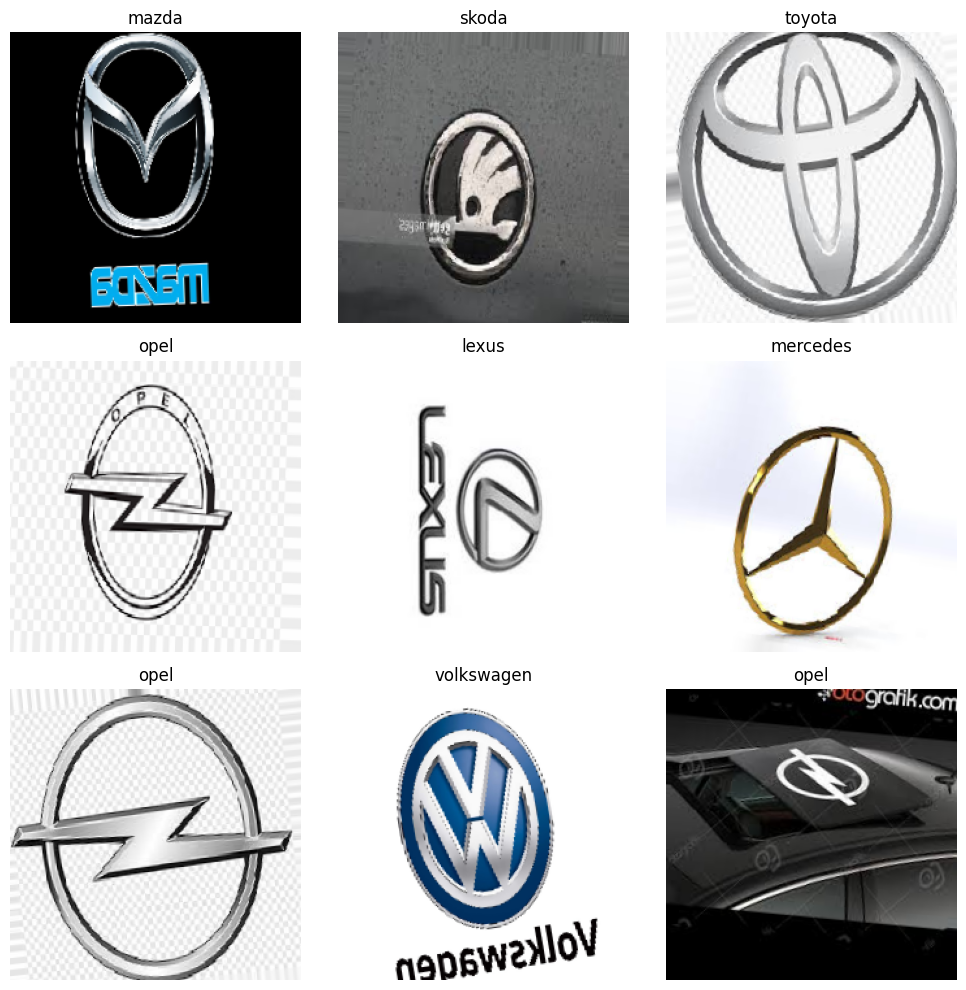

In [ ]:
index_to_class = {}
for label_name, label_index in train_loader.class_indices.items():
    index_to_class[label_index] = label_name

sample_images, sample_labels = next(train_loader)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"{index_to_class[int(sample_labels[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


The code defines a **Convolutional Neural Network (CNN)** model using Keras' Sequential API, which is then compiled and summarized. Below is a breakdown of the architecture:

1. **Input Shape:**
   - `input_img_shape = (224, 224, 3)`: The input images are expected to have a shape of 224x224 pixels with 3 color channels (RGB). This is a common input size for image classification models.

2. **Model Architecture (Sequential):**
   - `cnn_adam_model = Sequential([ ... ])`: The model is built using a sequence of layers where each layer takes the output of the previous one as input.

3. **First Convolutional Block:**
   - `Conv2D(16, (3, 3), activation='relu', input_shape=input_img_shape)`:
     - A convolutional layer with 16 filters, each of size 3x3. The activation function used is ReLU (Rectified Linear Unit).
     - `input_shape=input_img_shape`: This specifies the shape of the input image (224x224x3) for the first layer.
   - `MaxPooling2D(2, 2)`: A max-pooling layer with a pool size of 2x2, which reduces the spatial dimensions of the feature maps.

4. **Second Convolutional Block:**
   - `Conv2D(32, (3, 3), activation='relu')`: Another convolutional layer with 32 filters of size 3x3 and ReLU activation.
   - `MaxPooling2D(2, 2)`: Another max-pooling layer to reduce the spatial dimensions.

5. **Third Convolutional Block:**
   - `Conv2D(64, (3, 3), activation='relu')`: A convolutional layer with 64 filters of size 3x3 and ReLU activation.
   - `MaxPooling2D(2, 2)`: A max-pooling layer to reduce spatial dimensions further.

6. **Flattening and Fully Connected Layers:**
   - `Flatten()`: Flattens the output from the convolutional layers into a 1D vector, which is needed for the dense layers.
   - `Dense(64, activation='relu')`: A fully connected layer with 64 units and ReLU activation.
   - `Dense(32, activation='relu')`: A fully connected layer with 32 units and ReLU activation.
   - `Dense(16, activation='relu')`: A fully connected layer with 16 units and ReLU activation.

7. **Output Layer:**
   - `Dense(total_classes, activation='softmax')`: The output layer consists of `total_classes` units (8 in this case), with a softmax activation function. Softmax is commonly used for multi-class classification problems, as it outputs a probability distribution over all classes.

8. **Model Summary:**
   - `cnn_adam_model.summary()`: This line prints a summary of the model, including details about each layer, the number of parameters, and the output shapes at each step.

This model is a simple CNN designed for image classification with 8 output classes. The architecture includes three convolutional blocks followed by dense layers, making it capable of learning features at multiple levels of abstraction.


In [ ]:
input_img_shape = (224, 224, 3)
total_classes = 8

cnn_adam_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=input_img_shape),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(total_classes, activation='softmax')
])

cnn_adam_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,795,288 (10.66 MB)

 Trainable params: 2,795,288 (10.66 MB)

 Non-trainable params: 0 (0.00 B)

The code compiles the **Convolutional Neural Network (CNN)** model, preparing it for training. Here's a breakdown of each part:

1. **Optimizer:**
   - `optimizer='adam'`: The Adam optimizer is used here, which is a popular choice in deep learning due to its adaptive learning rate capabilities. It combines the advantages of two other optimizers (AdaGrad and RMSProp) and is well-suited for training models with large datasets and parameters.

2. **Loss Function:**
   - `loss='sparse_categorical_crossentropy'`: This loss function is used for multi-class classification problems. It is called "sparse" because the target labels are provided as integers (not one-hot encoded vectors). It measures the difference between the predicted class probabilities and the actual class labels.

3. **Metrics:**
   - `metrics=['accuracy']`: The model’s performance is evaluated using the accuracy metric, which calculates the proportion of correctly classified samples. Accuracy is commonly used for classification tasks to measure how often the model makes correct predictions.

This compilation step prepares the model to be trained using the specified optimizer, loss function, and evaluation metrics.


In [ ]:
cnn_adam_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


The code trains the **CNN model** using the `fit` method, with the addition of **callbacks** to monitor and adjust the training process. Below is a breakdown of the code:

1. **Training Callbacks:**
   - `ModelCheckpoint("cnn_adam_best.keras", save_best_only=True, monitor="val_accuracy", mode="max")`:
     - This callback saves the model with the best validation accuracy during training.
     - The model will be saved as `"cnn_adam_best.keras"` whenever the validation accuracy (`val_accuracy`) improves. The `mode="max"` ensures that the model is saved when the validation accuracy reaches its maximum.
   - `EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)`:
     - This callback stops training if the validation loss (`val_loss`) does not improve for 10 consecutive epochs (`patience=10`).
     - The `restore_best_weights=True` option ensures that the model weights are restored to the best weights from the epoch with the lowest validation loss.

2. **Model Training:**
   - `history_cnn_adam = cnn_adam_model.fit(...)`: This method trains the CNN model on the training data (`train_loader`) and validates it on the validation data (`val_loader`).
   - `train_loader`: The data generator that yields batches of training images and labels.
   - `validation_data=val_loader`: Specifies the validation data to evaluate the model during training.
   - `epochs=40`: The model will train for 40 epochs (iterations through the entire training dataset).
   - `batch_size=batch_size`: Specifies the number of samples in each batch processed by the model during training.
   - `callbacks=training_callbacks`: Specifies the list of callbacks (ModelCheckpoint and EarlyStopping) to be used during training.

The callbacks help in saving the best model and preventing overfitting by halting the training process early if the model's performance on the validation data stagnates.


In [ ]:
training_callbacks = [
    ModelCheckpoint("cnn_adam_best.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
]

history_cnn_adam = cnn_adam_model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=40,
    batch_size=batch_size,
    callbacks=training_callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 76s 559ms/step - accuracy: 0.1358 - loss: 2.1692 - val_accuracy: 0.1840 - val_loss: 2.0649
Epoch 2/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 345ms/step - accuracy: 0.1983 - loss: 2.0308 - val_accuracy: 0.3120 - val_loss: 1.9163
Epoch 3/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 346ms/step - accuracy: 0.3243 - loss: 1.8280 - val_accuracy: 0.4320 - val_loss: 1.6454
Epoch 4/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 351ms/step - accuracy: 0.4501 - loss: 1.5428 - val_accuracy: 0.4540 - val_loss: 1.5540
Epoch 5/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 351ms/step - accuracy: 0.4846 - loss: 1.4624 - val_accuracy: 0.4800 - val_loss: 1.5001
Epoch 6/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 345ms/step - accuracy: 0.5523 - loss: 1.2929 - val_accuracy: 0.5060 - val_loss: 1.4353
Epoch 7/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 344ms/step - accuracy: 0.5594 - loss: 1.2518 - val_accuracy: 0.5440 - val_loss: 1.3105
Epoch 8/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 349ms/step - accuracy: 0.6088 - loss: 1

The code generates a **plot** to visualize the training and validation performance of the **CNN model** over the epochs. It includes two subplots: one for accuracy and one for loss. Here's a breakdown of each part:

1. **Figure Setup:**
   - `plt.figure(figsize=(12, 6))`: This sets up the figure size for the plots, making them wide enough for clear visibility.

2. **Accuracy Plot:**
   - `plt.subplot(1, 2, 1)`: This creates the first subplot (1 row, 2 columns, first plot).
   - `plt.plot(history_cnn_adam.history['accuracy'], label='Train Accuracy')`: Plots the training accuracy over epochs.
   - `plt.plot(history_cnn_adam.history['val_accuracy'], label='Validation Accuracy')`: Plots the validation accuracy over epochs.
   - `plt.xlabel('Epochs')`: Labels the x-axis as 'Epochs'.
   - `plt.ylabel('Accuracy')`: Labels the y-axis as 'Accuracy'.
   - `plt.legend()`: Displays the legend to differentiate between training and validation accuracy.

3. **Loss Plot:**
   - `plt.subplot(1, 2, 2)`: This creates the second subplot (1 row, 2 columns, second plot).
   - `plt.plot(history_cnn_adam.history['loss'], label='Train Loss')`: Plots the training loss over epochs.
   - `plt.plot(history_cnn_adam.history['val_loss'], label='Validation Loss')`: Plots the validation loss over epochs.
   - `plt.xlabel('Epochs')`: Labels the x-axis as 'Epochs'.
   - `plt.ylabel('Loss')`: Labels the y-axis as 'Loss'.
   - `plt.legend()`: Displays the legend to differentiate between training and validation loss.

4. **Displaying the Plots:**
   - `plt.show()`: Displays the plots generated above.

This visualization helps in understanding how the model's accuracy and loss evolve during the training process, and allows you to evaluate the model's performance on both the training and validation datasets.


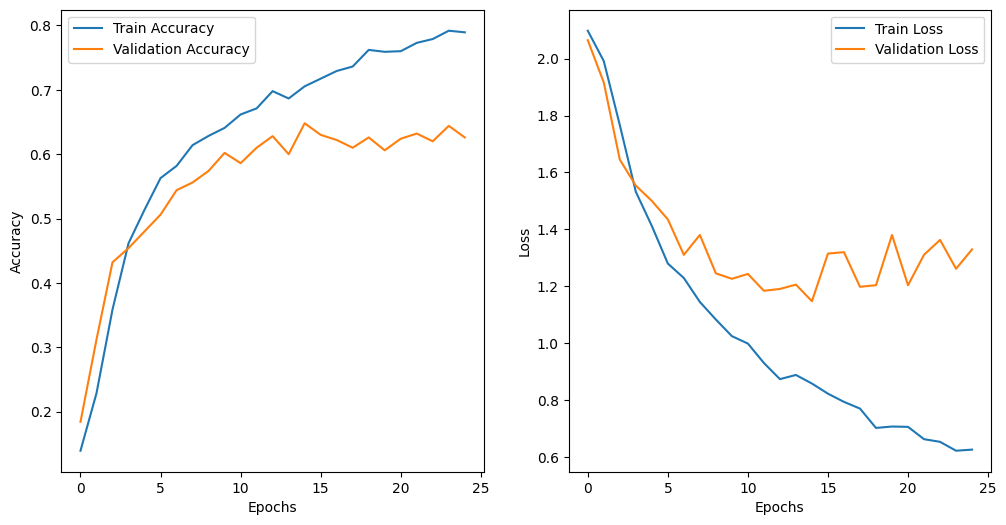

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_cnn_adam.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_adam.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_adam.history['loss'], label='Train Loss')
plt.plot(history_cnn_adam.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


The code prepares the test data using the **ImageDataGenerator** class and loads it into a generator for evaluation. Below is a breakdown of each part:

1. **Data Normalization:**
   - `test_datagen = ImageDataGenerator(rescale=1./255)`: This initializes the `ImageDataGenerator` for the test data. The `rescale=1./255` argument normalizes the image pixel values from the range [0, 255] to [0, 1] by dividing each pixel value by 255. This ensures that the images are in a format suitable for the model.

2. **Loading the Test Data:**
   - `test_loader = test_datagen.flow_from_directory(...)`: This method loads the images from the `test_dir` directory and prepares them for evaluation.
     - `test_dir`: The directory containing the test images.
     - `target_size=targetSize`: Resizes all images to the target size, which is `(224, 224)` as defined earlier.
     - `batch_size=batch_size`: Specifies that the test data will be loaded in batches of 16 images.
     - `class_mode='sparse'`: Indicates that the labels are provided as integers (not one-hot encoded), which is suitable for sparse categorical classification.
     - `shuffle=False`: Shuffling is disabled for the test data to ensure that the order of data remains consistent for evaluation.

The test loader prepares the data for evaluation and is used to evaluate the model on the unseen test dataset.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_loader = test_datagen.flow_from_directory(
    test_dir,
    target_size=targetSize,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


Found 400 images belonging to 8 classes.


The code evaluates the performance of the **CNN model** on the test dataset and prints the results. Below is a breakdown of each part:

1. **Model Evaluation:**
   - `test_loss_adam, test_accuracy_adam = cnn_adam_model.evaluate(test_loader)`:
     - The `evaluate` method is used to evaluate the trained model on the test data (`test_loader`).
     - This method returns two values:
       - `test_loss_adam`: The loss of the model on the test data.
       - `test_accuracy_adam`: The accuracy of the model on the test data.

2. **Printing the Results:**
   - `print(f"Test Loss: {test_loss_adam:.4f}")`: This prints the test loss, rounded to 4 decimal places.
   - `print(f"Test Accuracy: {test_accuracy_adam:.4f}")`: This prints the test accuracy, rounded to 4 decimal places.

The `evaluate` method computes the final performance of the model on the unseen test data, providing insights into how well the model generalizes to new, unseen examples.


In [ ]:
test_loss_adam, test_accuracy_adam = cnn_adam_model.evaluate(test_loader)

print(f"Test Loss: {test_loss_adam:.4f}")
print(f"Test Accuracy: {test_accuracy_adam:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 754ms/step - accuracy: 0.6495 - loss: 1.3633
Test Loss: 1.4788
Test Accuracy: 0.6075


The code evaluates the model's performance in terms of detailed classification metrics, such as precision, recall, and F1-score, using the **classification_report** from `sklearn`. Below is a breakdown of each part:

1. **Extract True Labels:**
   - `y_true = test_loader.classes`: This gets the true labels (ground truth) of the test data. `test_loader.classes` contains the integer class labels for each image in the test set.

2. **Make Predictions:**
   - `y_pred_probs = cnn_adam_model.predict(test_loader)`: This uses the trained model (`cnn_adam_model`) to predict the class probabilities for each image in the test set. The `predict` method outputs the probability for each class.
   - `y_pred = np.argmax(y_pred_probs, axis=1)`: Since the model outputs probabilities for each class, `np.argmax` is used to convert these probabilities into predicted class labels. This returns the index of the class with the highest probability, which corresponds to the predicted class.

3. **Class Names:**
   - `class_names = list(test_loader.class_indices.keys())`: This extracts the class names from the `test_loader`, which corresponds to the class labels for the dataset. These will be used to label the output in the classification report.

4. **Generate Classification Report:**
   - `print(classification_report(y_true, y_pred, target_names=class_names))`: This generates and prints a detailed classification report, showing precision, recall, F1-score, and support for each class. The `classification_report` function from `sklearn.metrics` compares the true labels (`y_true`) with the predicted labels (`y_pred`), and `target_names=class_names` ensures that the report includes the class names rather than numeric labels.

The classification report helps assess the quality of the model's predictions for each class in terms of various performance metrics, providing a more granular evaluation of the model's strengths and weaknesses.


In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_adam_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = list(test_loader.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step
              precision    recall  f1-score   support

     hyundai       0.47      0.70      0.56        50
       lexus       0.53      0.48      0.51        50
       mazda       0.78      0.78      0.78        50
    mercedes       0.59      0.74      0.65        50
        opel       0.82      0.56      0.67        50
       skoda       0.66      0.54      0.59        50
      toyota       0.63      0.38      0.47        50
  volkswagen       0.55      0.68      0.61        50

    accuracy                           0.61       400
   macro avg       0.63      0.61      0.61       400
weighted avg       0.63      0.61      0.61       400



The code generates and visualizes a **confusion matrix**, which provides insights into the performance of the model by showing the true versus predicted labels. Below is a breakdown of each part:

1. **Extract True and Predicted Labels:**
   - `y_true = test_loader.classes`: This retrieves the true labels (ground truth) from the test set. `test_loader.classes` contains the integer class labels for each image in the test dataset.
   - `y_pred_probs = cnn_adam_model.predict(test_loader)`: This uses the trained model (`cnn_adam_model`) to predict the class probabilities for each image in the test set.
   - `y_pred = np.argmax(y_pred_probs, axis=1)`: Since the model outputs probabilities for each class, `np.argmax` is used to get the predicted class label by selecting the class with the highest probability.

2. **Compute Confusion Matrix:**
   - `cm = confusion_matrix(y_true, y_pred)`: This computes the confusion matrix, which compares the true labels (`y_true`) with the predicted labels (`y_pred`). The confusion matrix is a 2D array where each element at position `(i, j)` represents the number of times the true label `i` was predicted as `j`.

3. **Plotting the Heatmap:**
   - `plt.figure(figsize=(10, 8))`: This sets the figure size for the heatmap.
   - `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ...)`: This creates a heatmap from the confusion matrix `cm`.
     - `annot=True`: Annotates each cell with its numeric value.
     - `fmt='d'`: Specifies the format of the numbers in the cells (integer format).
     - `cmap='Blues'`: Chooses the color palette for the heatmap.
     - `xticklabels=test_loader.class_indices.keys()`: Labels the x-axis with the class names (predicted labels).
     - `yticklabels=test_loader.class_indices.keys()`: Labels the y-axis with the class names (true labels).
   - `plt.xlabel('Predicted Labels')` and `plt.ylabel('True Labels')`: Labels the x-axis and y-axis for clarity.
   - `plt.title('Confusion Matrix Heatmap')`: Sets the title for the heatmap.
   - `plt.tight_layout()`: Ensures that the layout is adjusted so that everything fits well within the figure.
   - `plt.show()`: Displays the heatmap.

The confusion matrix heatmap provides a clear visualization of how well the model's predictions align with the actual classes, helping to identify any misclassifications.


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step


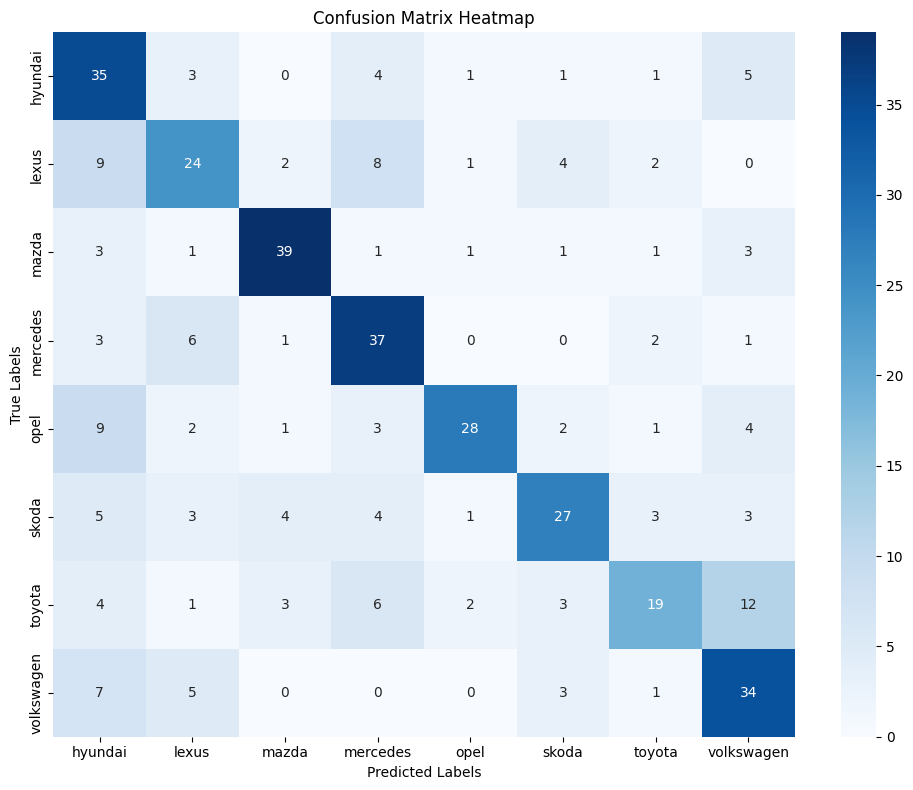

In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_adam_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_loader.class_indices.keys(),
            yticklabels=test_loader.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


This code visualizes the predictions made by the trained model on a set of images sampled from the test dataset, showing both the true and predicted labels. It also computes the prediction accuracy for these sampled images.

### Steps:

1. **Collect One Image per Class from the Test Set:**
   - The code loops over the `test_loader` to sample one image for each class. It uses a `found_classes` set to track which classes have already been sampled.
   - The loop continues until one image from each class has been collected (up to the `total_classes`).

2. **Make Predictions:**
   - The sampled images are passed to the model (`cnn_adam_model`) for prediction using `cnn_adam_model.predict(sample_images)`.
   - The `np.argmax` function is used to obtain the predicted class labels from the predicted probabilities.

3. **Determine Grid Layout:**
   - The number of rows and columns for the grid are determined based on the number of classes, ensuring that the layout fits within a 2-row maximum grid if needed.

4. **Create the Plot:**
   - A figure of size (16, 8) is created to accommodate the images and their titles.
   - For each sampled image, a subplot is created using `plt.subplot`.
     - The true class and predicted class are displayed in the title of each subplot.
     - The title is colored **green** if the prediction is correct and **red** if it is incorrect.

5. **Handle Empty Subplots:**
   - If there are fewer than `n_cols * n_rows` images, any remaining subplots are left empty.

6. **Display the Plot:**
   - `plt.tight_layout()` ensures the subplots are well arranged.
   - `plt.show()` renders the figure with the images and their titles.

7. **Compute Prediction Accuracy:**
   - The code counts how many predictions match the true labels and computes the prediction accuracy for the sampled images.
   - It then prints the accuracy in a readable format.

This process helps to visually inspect how well the model is performing on a sample of test data by comparing the predicted labels with the actual labels.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


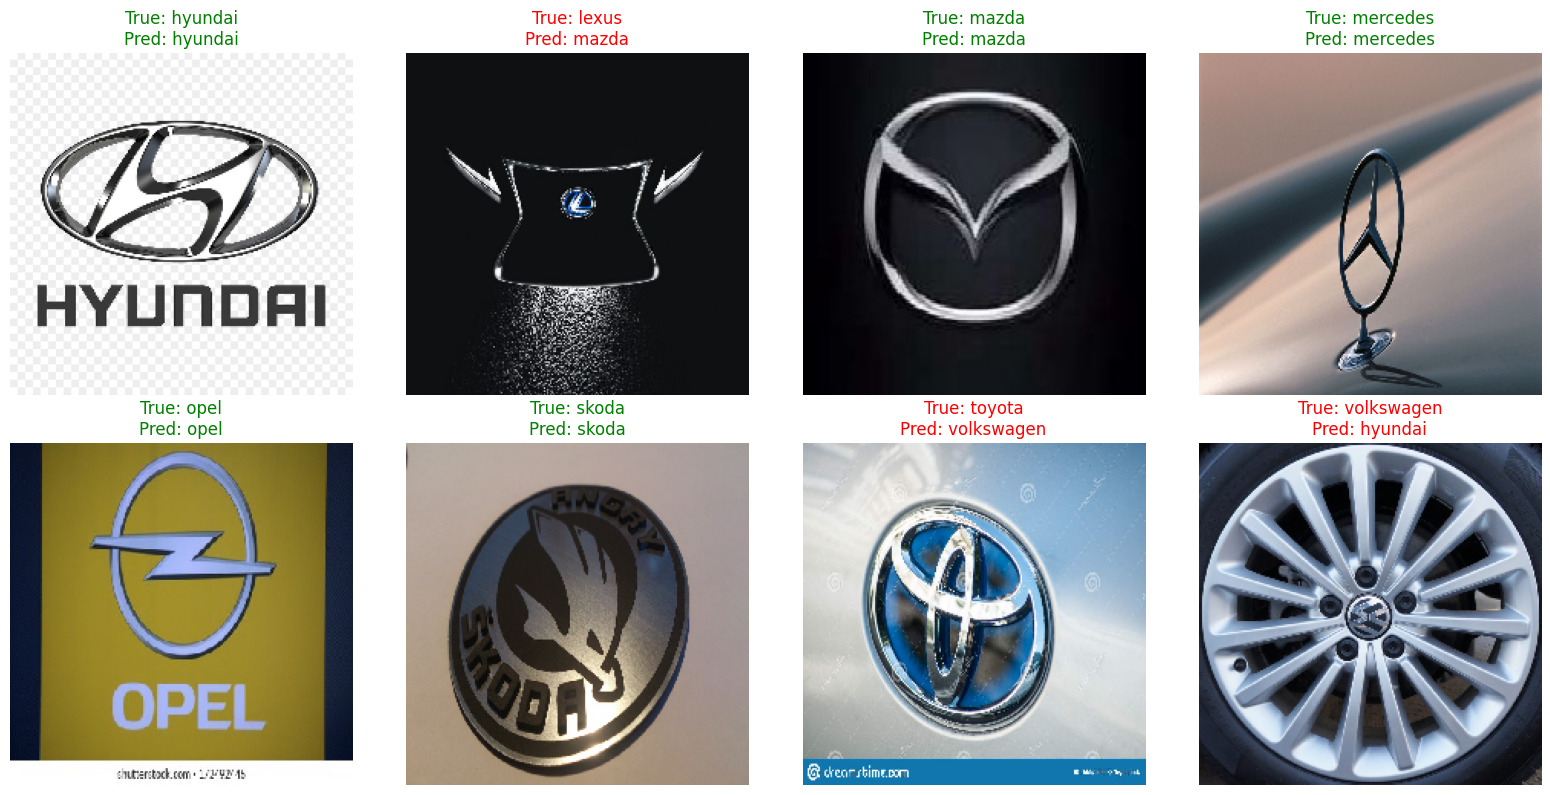


Sample Prediction Accuracy: 5/8 (62.5%)


In [ ]:
sample_images = []
sample_labels = []
found_classes = set()

# Collect one image per class from the test generator
for images, labels in test_loader:
    for img, lbl in zip(images, labels):
        lbl = int(lbl)  # Convert to integer class index
        if lbl not in found_classes:
            sample_images.append(img)
            sample_labels.append(lbl)
            found_classes.add(lbl)
            if len(found_classes) == total_classes:
                break
    if len(found_classes) == total_classes:
        break

# Convert to numpy arrays
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# Make predictions
sample_preds = cnn_adam_model.predict(sample_images)
predicted_classes = np.argmax(sample_preds, axis=1)

# Determine grid layout based on number of classes
n_cols = 4
n_rows = min(2, (total_classes + n_cols - 1) // n_cols)  # Max 2 rows

# Create the plot
plt.figure(figsize=(16, 8))
for i in range(len(sample_images)):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(sample_images[i])
    true_name = class_names[sample_labels[i]]
    pred_name = class_names[predicted_classes[i]]
    color = 'green' if true_name == pred_name else 'red'
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color)
    plt.axis('off')

# Handle case where we have empty subplots
for i in range(len(sample_images), n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print classification accuracy on these samples
correct = sum(predicted_classes == sample_labels)
print(f"\nSample Prediction Accuracy: {correct}/{len(sample_labels)} ({correct/len(sample_labels):.1%})")


### Model Architecture Explanation

This code defines a **Convolutional Neural Network (CNN)** using the **Sequential** API from Keras. The model is designed with multiple convolutional layers, batch normalization, dropout for regularization, and L2 regularization to prevent overfitting.

#### Overview of Layers:

1. **Input Layer:**
   - The input shape of the images is `(224, 224, 3)` which corresponds to a 224x224 RGB image.
   
2. **Convolutional Blocks:**
   - The model has **4 blocks** of convolutional layers. Each block contains:
     - Two **Conv2D** layers with ReLU activation and `l2` regularization (with a strength of 0.001).
     - **BatchNormalization** to stabilize and speed up training by normalizing activations.
     - A **MaxPooling2D** layer to downsample the feature maps.
     - **Dropout** layers (with a rate of 0.25) to prevent overfitting by randomly setting a fraction of input units to 0 during training.
   
3. **Fully Connected (Dense) Layer:**
   - After the convolutional layers, the feature maps are flattened using `Flatten()` to feed into the fully connected (dense) layers.
   - **Dense(256)** with ReLU activation and `l2` regularization to perform classification.
   - **BatchNormalization** after each dense layer to improve training speed.
   - **Dropout(0.5)** to reduce overfitting by dropping half of the neurons in the fully connected layers.

4. **Output Layer:**
   - The final layer is a **Dense layer** with a **softmax activation** function, which outputs a probability distribution over the `total_classes` (8 classes in this case).

#### Regularization:
- **L2 regularization** is applied to both convolutional and dense layers to penalize large weights and help prevent overfitting.
  
#### Summary of Layers:
- The model's architecture consists of **convolutional layers** followed by **batch normalization**, **max pooling**, and **dropout**. After the convolutional layers, the feature maps are passed through **fully connected layers** for classification.

This model uses **SGD (Stochastic Gradient Descent)** optimizer to train on the data with **L2 regularization** to enhance generalization.

### Model Summary:
After defining the architecture, `cnn_sgd_model.summary()` is called to print the details of the model’s layers, number of parameters, and output shapes for each layer.


In [ ]:
from tensorflow.keras.regularizers import l2

input_img_shape = (224, 224, 3)
total_classes = 8

cnn_sgd_model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same',
           input_shape=input_img_shape, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Classification block
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(total_classes, activation='softmax')
])

cnn_sgd_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,056,872 (53.62 MB)

 Trainable params: 14,054,184 (53.61 MB)

 Non-trainable params: 2,688 (10.50 KB)

### Model Compilation with SGD Optimizer

This code compiles the CNN model with the **SGD (Stochastic Gradient Descent)** optimizer. The key aspects of the compilation process are outlined below:

1. **Optimizer: SGD**
   - The **SGD optimizer** is used with the following hyperparameters:
     - **Learning Rate**: `0.001` (controls how much to change the model in response to the estimated error each time the model weights are updated).
     - **Momentum**: `0.9` (helps accelerate gradients vectors in the right directions, thereby leading to faster converging).
     - **Nesterov Momentum**: `True` (a variant of momentum where the gradient is calculated after the momentum is applied, improving convergence and leading to faster training).

2. **Loss Function: Sparse Categorical Crossentropy**
   - The **sparse categorical crossentropy** loss is used for multi-class classification tasks where the labels are integers (as opposed to one-hot encoded labels).

3. **Metrics: Accuracy**
   - The model tracks **accuracy** during training and evaluation to assess the performance of the model on both training and validation data.

After compiling the model, it is ready to be trained using the specified optimizer and loss function.

### Code Summary:
The model is compiled with the **SGD optimizer**, **sparse categorical crossentropy loss**, and **accuracy** as the evaluation metric. This setup is suitable for multi-class classification tasks where the labels are in integer form.


In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

cnn_sgd_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Enhanced Callbacks for Training

This code defines and uses enhanced callbacks to improve the training process of the CNN model with the **SGD optimizer**. Here's a breakdown of the callbacks used:

1. **ModelCheckpoint:**
   - **Purpose**: Saves the model at the best epoch based on validation accuracy.
   - **Arguments**:
     - `save_best_only=True`: Only saves the model if the validation accuracy improves.
     - `monitor="val_accuracy"`: Monitors the validation accuracy.
     - `mode="max"`: The best model is saved when the monitored value (validation accuracy) is maximized.

2. **EarlyStopping:**
   - **Purpose**: Stops the training early if the validation loss does not improve for a certain number of epochs (patience).
   - **Arguments**:
     - `monitor="val_loss"`: Monitors the validation loss.
     - `patience=15`: Stops training if the validation loss doesn't improve for 15 epochs.
     - `restore_best_weights=True`: Restores the weights from the epoch with the best validation loss after training stops.

3. **ReduceLROnPlateau:**
   - **Purpose**: Reduces the learning rate when the validation loss plateaus to help the model converge more smoothly.
   - **Arguments**:
     - `monitor="val_loss"`: Monitors the validation loss.
     - `factor=0.2`: Reduces the learning rate by a factor of 0.2 when the validation loss has not improved.
     - `patience=5`: Waits for 5 epochs before reducing the learning rate.
     - `min_lr=1e-6`: Sets a minimum limit for the learning rate to avoid it becoming too small.

### Training with Enhanced Callbacks:
The model is trained with the **train_loader** and **validation_loader** for **40 epochs**. The callbacks will help monitor the model's performance and adjust the training process dynamically.

These callbacks contribute to:
- **Saving the best model** based on validation accuracy.
- **Early stopping** to prevent overfitting if there's no improvement in validation loss.
- **Dynamic learning rate adjustments** to ensure the model converges efficiently.

This results in more robust and efficient training.


In [ ]:
# Enhanced callbacks
callbacks_sgd = [
    ModelCheckpoint("cnn_sgd_best.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6)
]

history_cnn_sgd = cnn_sgd_model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=40,
    callbacks=callbacks_sgd
)


Epoch 1/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 85s 536ms/step - accuracy: 0.1584 - loss: 4.0630 - val_accuracy: 0.1500 - val_loss: 4.1094 - learning_rate: 0.0010
Epoch 2/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 48s 376ms/step - accuracy: 0.2202 - loss: 3.7155 - val_accuracy: 0.1680 - val_loss: 4.6077 - learning_rate: 0.0010
Epoch 3/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 47s 374ms/step - accuracy: 0.2441 - loss: 3.5831 - val_accuracy: 0.2500 - val_loss: 3.5292 - learning_rate: 0.0010
Epoch 4/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 47s 374ms/step - accuracy: 0.2803 - loss: 3.4866 - val_accuracy: 0.3000 - val_loss: 3.4224 - learning_rate: 0.0010
Epoch 5/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 365ms/step - accuracy: 0.3290 - loss: 3.3424 - val_accuracy: 0.3680 - val_loss: 3.3255 - learning_rate: 0.0010
Epoch 6/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 366ms/step - accuracy: 0.3678 - loss: 3.2904 - val_accuracy: 0.2540 - val_loss: 3.6263 - learning_rate: 0.0010
Epoch 7/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 45s 359ms/step - accuracy: 0.3

### Training and Validation Performance Visualization

This code generates two plots to visualize the model’s performance during training. It displays both **accuracy** and **loss** metrics for the training and validation datasets. These plots help track how well the model is learning and generalizing over epochs.

1. **Accuracy Plot (Left Plot):**
   - **Purpose**: Compares the training and validation accuracy over epochs.
   - **X-axis**: Number of epochs.
   - **Y-axis**: Accuracy (%) of the model.
   - **Lines**:
     - **Train Accuracy**: Accuracy achieved by the model on the training dataset.
     - **Validation Accuracy**: Accuracy on the validation dataset, which helps monitor overfitting.

2. **Loss Plot (Right Plot):**
   - **Purpose**: Compares the training and validation loss over epochs.
   - **X-axis**: Number of epochs.
   - **Y-axis**: Loss value, where a lower value indicates better performance.
   - **Lines**:
     - **Train Loss**: Loss on the training dataset.
     - **Validation Loss**: Loss on the validation dataset, which helps indicate overfitting if it increases while training loss decreases.

These visualizations are crucial for:
- Understanding whether the model is overfitting (i.e., training accuracy increases but validation accuracy decreases).
- Monitoring the training process to adjust hyperparameters if necessary.


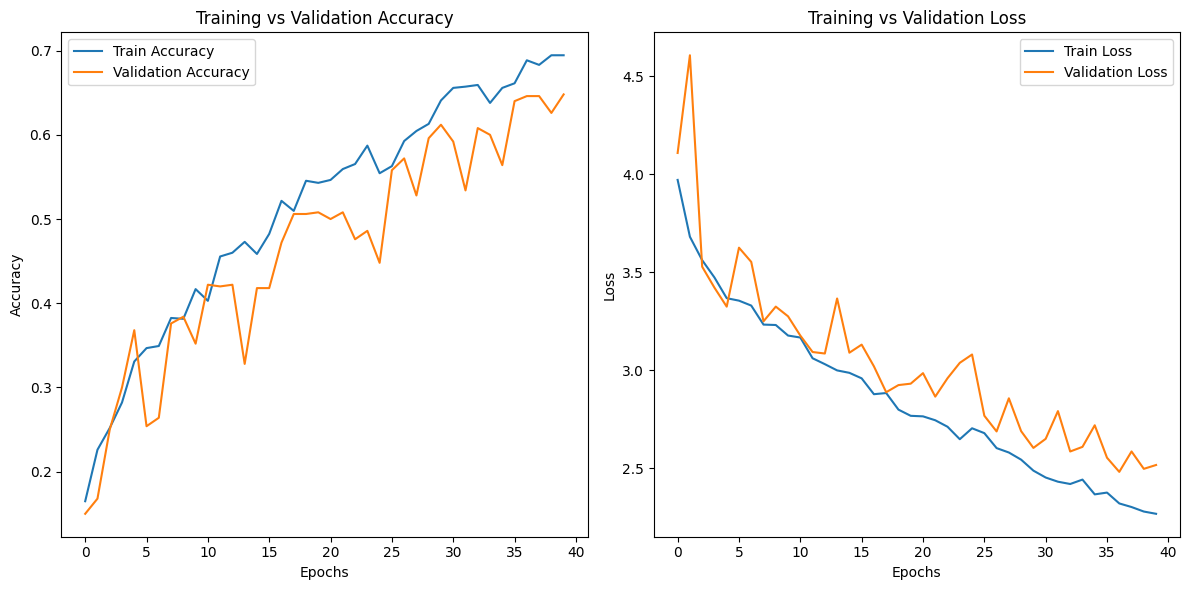

In [ ]:
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn_sgd.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn_sgd.history['loss'], label='Train Loss')
plt.plot(history_cnn_sgd.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.tight_layout()
plt.show()


### Evaluating the Model on the Test Set

The following code evaluates the performance of the **SGD-based CNN model** on the test dataset. The evaluation includes calculating the **loss** and **accuracy** of the model on data it has not seen during training.

1. **Test Loss**:
   - This metric indicates how well the model is performing in terms of error (the lower the better). It is the value of the loss function computed on the test set.
   - The model tries to minimize this value during training.

2. **Test Accuracy**:
   - This is the percentage of correctly classified samples in the test set.
   - A higher accuracy indicates better performance in correctly classifying images.

The `cnn_sgd_model.evaluate()` function calculates these values and prints them, allowing us to assess the model's generalization ability on unseen data.


In [ ]:
cnn_sgd_test_loss, cnn_sgd_test_accuracy = cnn_sgd_model.evaluate(test_loader)

print(f"Test Loss: {cnn_sgd_test_loss:.4f}")
print(f"Test Accuracy: {cnn_sgd_test_accuracy:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.6403 - loss: 2.6354
Test Loss: 2.6359
Test Accuracy: 0.6325


### Classification Report on Test Data

The following code generates a **classification report** for the model's performance on the test set. The **classification report** provides detailed metrics such as **precision**, **recall**, and **F1-score** for each class in the test set.

1. **True Labels** (`y_true`):
   - These are the actual class labels from the test dataset.

2. **Predicted Labels** (`y_pred`):
   - These are the predicted class labels obtained from the model's output.
   - The model provides probabilities for each class, and `np.argmax()` is used to select the class with the highest probability.

3. **Classification Report**:
   - `classification_report()` from `sklearn.metrics` provides a breakdown of the performance for each class, including:
     - **Precision**: The proportion of correct positive predictions for a given class.
     - **Recall**: The proportion of actual positives that were correctly identified.
     - **F1-Score**: The harmonic mean of precision and recall, balancing the two.
     - **Support**: The number of true instances for each class.

This report helps in evaluating the model's ability to distinguish between different classes, as well as its overall performance across all classes.


In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_sgd_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = list(test_loader.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step
              precision    recall  f1-score   support

     hyundai       0.70      0.62      0.66        50
       lexus       0.52      0.52      0.52        50
       mazda       0.62      0.78      0.69        50
    mercedes       0.61      0.72      0.66        50
        opel       0.71      0.64      0.67        50
       skoda       0.66      0.66      0.66        50
      toyota       0.73      0.38      0.50        50
  volkswagen       0.59      0.74      0.65        50

    accuracy                           0.63       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.64      0.63      0.63       400



### Confusion Matrix for Model Performance

This code generates a **confusion matrix heatmap** to visualize the performance of the model on the test dataset. The **confusion matrix** is a tool used to assess the accuracy of a classification model by comparing the predicted labels with the true labels.

1. **True Labels** (`y_true`):
   - These are the actual class labels from the test dataset. The `test_loader.classes` gives the correct labels for each image.

2. **Predicted Labels** (`y_pred`):
   - These are the predicted class labels, derived from the model's output probabilities. The `np.argmax()` function is used to select the class with the highest predicted probability.

3. **Confusion Matrix**:
   - The confusion matrix is computed using `confusion_matrix()` from the `sklearn.metrics` library. It shows how many times each true class was classified as each predicted class. The matrix looks like this:
     - The rows represent the actual (true) classes.
     - The columns represent the predicted classes.

4. **Heatmap**:
   - The confusion matrix is visualized as a heatmap using `sns.heatmap()`. The color intensity represents the number of instances for each true-predicted class pair, making it easier to see where the model is performing well and where it is making mistakes.
   - The `annot=True` argument ensures that the count is displayed on each cell of the heatmap.

This confusion matrix provides insights into how well the model is distinguishing between each class and highlights areas where the model may need improvement.


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step


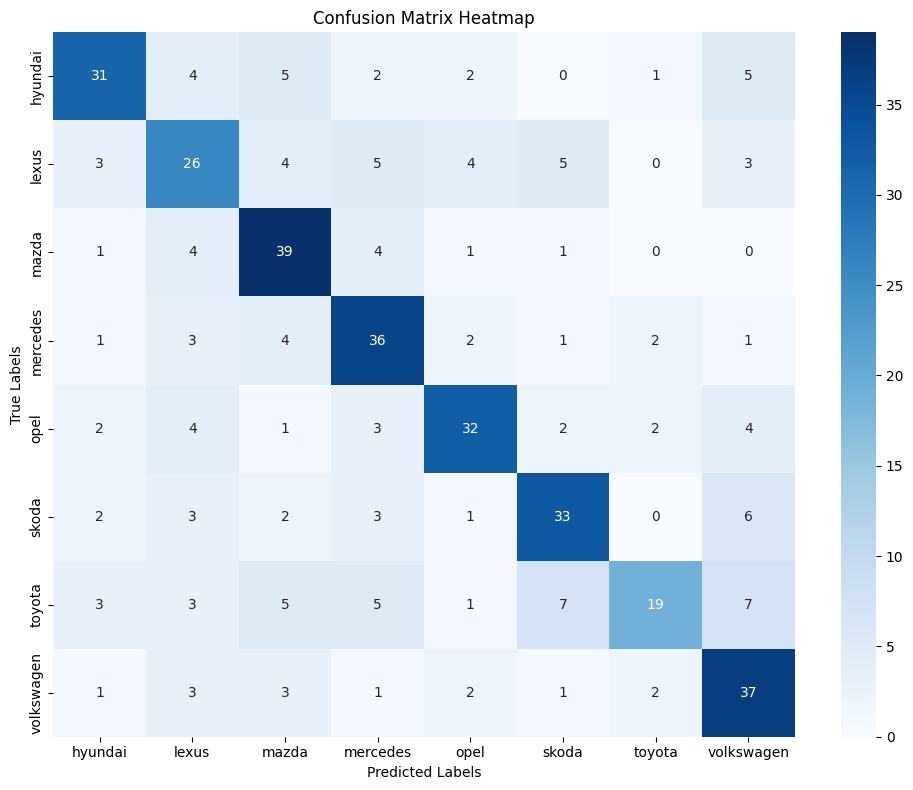

In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_sgd_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_loader.class_indices.keys(),
            yticklabels=test_loader.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


### Visualizing Model Predictions for Sample Test Images

This code collects one image from each class in the test dataset, makes predictions using the `cnn_sgd_model`, and visualizes the results in a grid.

1. **Collecting One Image Per Class**:
   - We iterate through the test dataset and select one image from each class to evaluate the model's predictions on a diverse set of classes.
   - The images and their corresponding labels are stored in `sample_images` and `sample_labels`.

2. **Model Predictions**:
   - The model (`cnn_sgd_model`) is used to predict the class for each sample image.
   - The predictions are converted to class labels using `np.argmax()`, which selects the class with the highest predicted probability.

3. **Plotting the Images**:
   - A grid of images is created using `matplotlib`. Each image is displayed along with the true label (from the test set) and the predicted label (from the model).
   - If the model's prediction is correct, the title is shown in green; otherwise, it's shown in red.
   - The grid layout is dynamically adjusted based on the number of classes and images.

4. **Prediction Accuracy**:
   - After displaying the images, the code calculates the accuracy of the model on these sample images by comparing the predicted labels with the true labels.
   - The accuracy is printed as a percentage of correct predictions.

This visualization helps in understanding how well the model is performing on individual samples from different classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


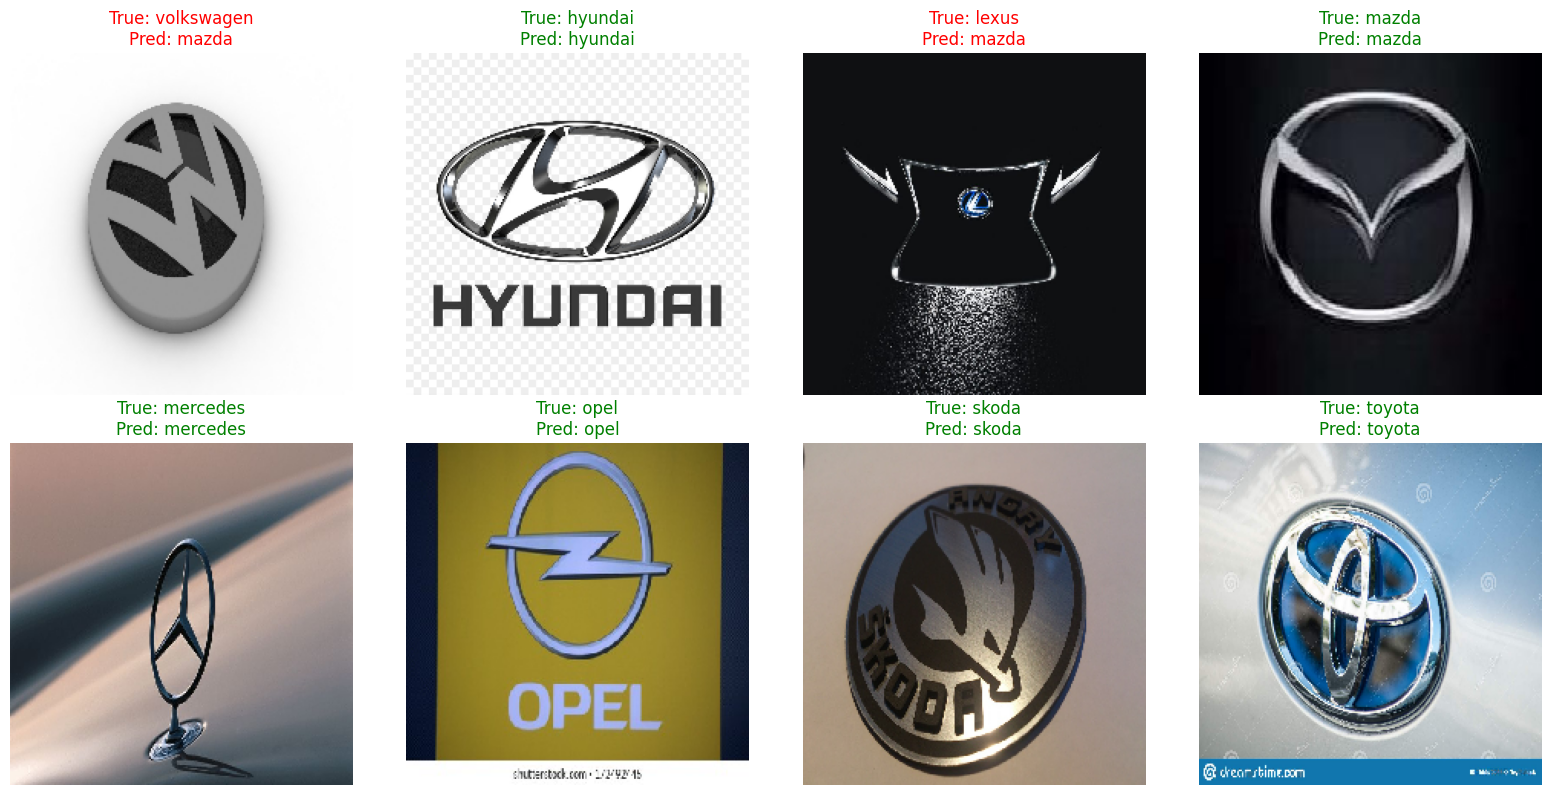


Sample Prediction Accuracy: 6/8 (75.0%)


In [ ]:
# Initialize storage for sample images and labels
sample_images = []
sample_labels = []
found_classes = set()

# Collect one image per class from the test generator
for images, labels in test_loader:
    for img, lbl in zip(images, labels):
        lbl = int(lbl)  # Convert to integer class index
        if lbl not in found_classes:
            sample_images.append(img)
            sample_labels.append(lbl)
            found_classes.add(lbl)
            if len(found_classes) == total_classes:
                break
    if len(found_classes) == total_classes:
        break

# Convert to numpy arrays
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# Make predictions using cnn_sgd_model
sample_preds = cnn_sgd_model.predict(sample_images)
predicted_classes = np.argmax(sample_preds, axis=1)

# Determine grid layout based on number of classes
n_cols = 4
n_rows = min(2, (total_classes + n_cols - 1) // n_cols)  # Max 2 rows

# Create the plot
plt.figure(figsize=(16, 8))
for i in range(len(sample_images)):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(sample_images[i])
    true_name = class_names[sample_labels[i]]
    pred_name = class_names[predicted_classes[i]]
    color = 'green' if true_name == pred_name else 'red'
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color)
    plt.axis('off')

# Handle case where we have empty subplots
for i in range(len(sample_images), n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print classification accuracy on these samples
correct = sum(predicted_classes == sample_labels)
print(f"\nSample Prediction Accuracy: {correct}/{len(sample_labels)} ({correct/len(sample_labels):.1%})")


## Deep Convolutional Neural Network (CNN) Architecture

The model is a deep convolutional neural network (CNN) designed for image classification with the following layers:

### 1. **Block 1:**
- **Conv2D** layer with 16 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **Conv2D** layer with another 16 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **MaxPooling2D** layer with a 2x2 pool size to downsample the feature map.
- **Dropout** layer with a rate of 0.25 to reduce overfitting.

### 2. **Block 2:**
- **Conv2D** layer with 32 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **Conv2D** layer with another 32 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **MaxPooling2D** layer with a 2x2 pool size to downsample the feature map.
- **Dropout** layer with a rate of 0.25.

### 3. **Block 3:**
- **Conv2D** layer with 64 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **Conv2D** layer with another 64 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **MaxPooling2D** layer with a 2x2 pool size.
- **Dropout** layer with a rate of 0.3.

### 4. **Block 4:**
- **Conv2D** layer with 128 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **Conv2D** layer with another 128 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **MaxPooling2D** layer with a 2x2 pool size.
- **Dropout** layer with a rate of 0.3.

### 5. **Block 5:**
- **Conv2D** layer with 256 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **Conv2D** layer with another 256 filters and a 3x3 kernel size, followed by **BatchNormalization**.
- **MaxPooling2D** layer with a 2x2 pool size.
- **Dropout** layer with a rate of 0.4.

### 6. **Classification Block:**
- **Flatten** layer to convert 2D feature maps into a 1D vector.
- **Dense** layer with 128 units, followed by **BatchNormalization** and **Dropout** (0.5).
- **Dense** layer with another 128 units, followed by **BatchNormalization** and **Dropout** (0.5).
- Final **Dense** layer with `softmax` activation to output class probabilities for a total of 8 classes.

### Key Design Choices:
- **Dropout**: Applied at multiple points throughout the network (25% to 50%) to reduce overfitting.
- **BatchNormalization**: Applied after each convolutional layer to stabilize the learning process.
- **L2 Regularization**: Used in convolutional and dense layers to penalize large weights and avoid overfitting.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

input_img_shape = (224, 224, 3)
total_classes = 8

cnn_deep_adam_model = Sequential([
    # Block 1
    Conv2D(16, (3, 3), activation='relu', padding='same',
           input_shape=input_img_shape, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Block 2
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Block 3
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # Block 4
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # Block 5
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    # Classification block
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(total_classes, activation='softmax')
])

cnn_deep_adam_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,807,064 (10.71 MB)

 Trainable params: 2,804,568 (10.70 MB)

 Non-trainable params: 2,496 (9.75 KB)

### Model Compilation

The CNN model is compiled using the **Adam optimizer** and **sparse categorical crossentropy loss**. The model will track **accuracy** as the evaluation metric.

- **Optimizer**: Adam is an adaptive learning rate optimizer.
- **Loss Function**: Sparse categorical crossentropy is used because the model outputs class indices as labels (integer labels, not one-hot encoded).
- **Metrics**: Accuracy is tracked during training and evaluation to monitor the performance of the model.


In [ ]:
cnn_deep_adam_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Model Training with Callbacks

To enhance the model training process, the following callbacks have been applied:

1. **ModelCheckpoint**: Saves the best model based on the highest validation accuracy (`val_accuracy`).
   - Saves only the best model with the highest validation accuracy.
   - File name: `cnn_deep_adam_best.keras`.

2. **EarlyStopping**: Stops training if the validation loss (`val_loss`) does not improve for 10 consecutive epochs.
   - Restores the best weights from the training process when stopped.

3. **ReduceLROnPlateau**: Reduces the learning rate by a factor of 0.2 if the validation loss plateaus for 5 epochs.
   - Minimum learning rate is set to `1e-6`.

The model is trained for **40 epochs**, using the training and validation datasets from the `train_loader` and `val_loader`, respectively. The callbacks are used to manage the training process, save the best model, and avoid overfitting by early stopping and adjusting the learning rate when necessary.


In [ ]:
callbacks_adam = [
    ModelCheckpoint("cnn_deep_adam_best.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6)
]

history_cnn_deep_adam = cnn_deep_adam_model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=40,
    callbacks=callbacks_adam
)


Epoch 1/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 85s 496ms/step - accuracy: 0.1534 - loss: 4.3735 - val_accuracy: 0.1200 - val_loss: 5.4325 - learning_rate: 0.0010
Epoch 2/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 366ms/step - accuracy: 0.1597 - loss: 4.0560 - val_accuracy: 0.1340 - val_loss: 3.6598 - learning_rate: 0.0010
Epoch 3/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.1697 - loss: 3.8328 - val_accuracy: 0.1780 - val_loss: 3.5265 - learning_rate: 0.0010
Epoch 4/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 55s 441ms/step - accuracy: 0.1709 - loss: 3.7066 - val_accuracy: 0.1660 - val_loss: 3.5755 - learning_rate: 0.0010
Epoch 5/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 362ms/step - accuracy: 0.1865 - loss: 3.5193 - val_accuracy: 0.2400 - val_loss: 3.3143 - learning_rate: 0.0010
Epoch 6/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 45s 354ms/step - accuracy: 0.1950 - loss: 3.4520 - val_accuracy: 0.2660 - val_loss: 3.2592 - learning_rate: 0.0010
Epoch 7/40
126/126 ━━━━━━━━━━━━━━━━━━━━ 55s 441ms/step - accuracy: 0.2

### Model Training and Evaluation Plots

Below are the plots for the training process of the deep convolutional neural network using the Adam optimizer.

1. **Training vs Validation Accuracy**: The plot compares the training and validation accuracy over epochs. This shows how well the model performs during training and how well it generalizes to the validation data.

2. **Training vs Validation Loss**: This plot shows the loss values for both the training and validation sets. A lower loss indicates better performance. By comparing the training and validation loss, we can check for signs of overfitting or underfitting.

Both plots are shown side by side for an easy comparison of accuracy and loss trends throughout the training process.


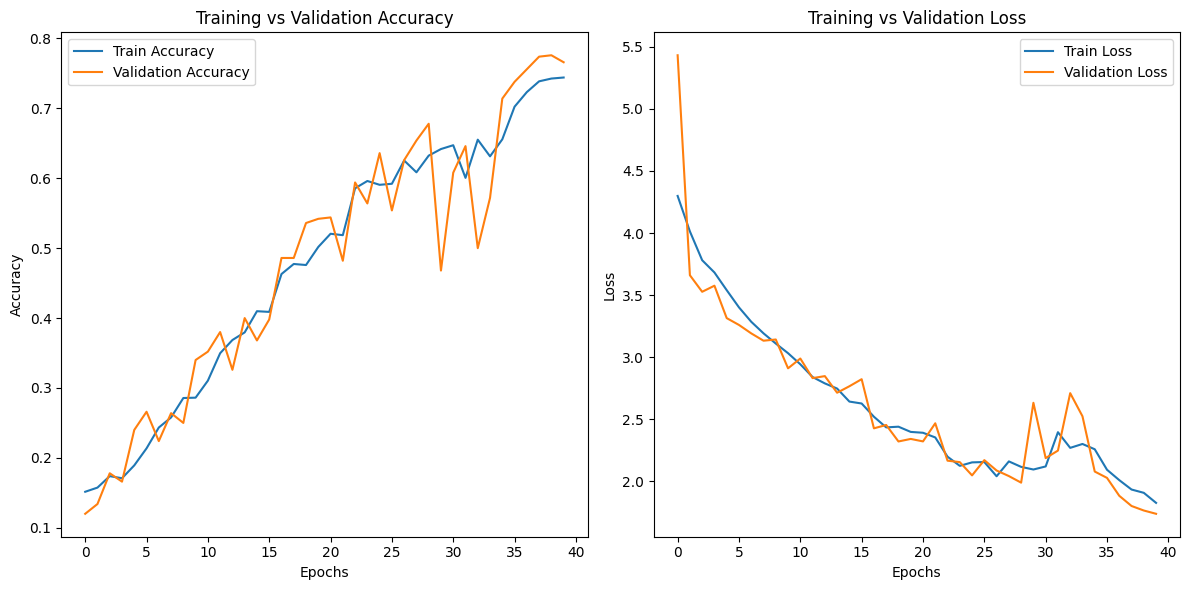

In [ ]:
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn_deep_adam.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_deep_adam.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn_deep_adam.history['loss'], label='Train Loss')
plt.plot(history_cnn_deep_adam.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.tight_layout()
plt.show()


### Model Evaluation on Test Data

The model was evaluated on the test dataset, and the following results were obtained:

- **Test Loss**: This represents how well the model performs on the test data, with a lower value indicating better performance.
- **Test Accuracy**: This shows the percentage of correct predictions made by the model on the test data.

The results provide an insight into how well the trained model generalizes to unseen data.


In [ ]:
cnn_deep_adam_test_loss, cnn_deep_adam_test_accuracy = cnn_deep_adam_model.evaluate(test_loader)

print(f"Test Loss: {cnn_deep_adam_test_loss:.4f}")
print(f"Test Accuracy: {cnn_deep_adam_test_accuracy:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.7668 - loss: 1.8303
Test Loss: 1.8782
Test Accuracy: 0.7375


### Classification Report

The classification report provides a detailed analysis of the model's performance for each class in terms of precision, recall, F1-score, and support. Here's a summary of the metrics:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It tells us how many of the predicted positive labels were actually correct.
- **Recall**: The ratio of correctly predicted positive observations to all the observations in the actual class. It tells us how many of the actual positive labels were captured by the model.
- **F1-score**: The weighted average of Precision and Recall. It is useful when the class distribution is imbalanced.
- **Support**: The number of true instances for each class in the dataset.

This report helps assess the model's ability to distinguish between the classes in the dataset and whether there are any imbalances or areas needing improvement.


In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_deep_adam_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = list(test_loader.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step
              precision    recall  f1-score   support

     hyundai       0.67      0.76      0.71        50
       lexus       0.61      0.76      0.68        50
       mazda       0.91      0.80      0.85        50
    mercedes       0.71      0.78      0.74        50
        opel       0.64      0.72      0.68        50
       skoda       0.81      0.76      0.78        50
      toyota       0.93      0.54      0.68        50
  volkswagen       0.78      0.78      0.78        50

    accuracy                           0.74       400
   macro avg       0.76      0.74      0.74       400
weighted avg       0.76      0.74      0.74       400



### Confusion Matrix

A confusion matrix is a tool used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model, broken down by class. Each row of the matrix represents the actual class, and each column represents the predicted class.

In the heatmap displayed:
- **Diagonal values** indicate the number of correct predictions for each class.
- **Off-diagonal values** show misclassifications, where the model predicted the wrong class.

By analyzing the confusion matrix, we can understand where the model is making errors and potentially address issues such as class imbalances or mislabeling.


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


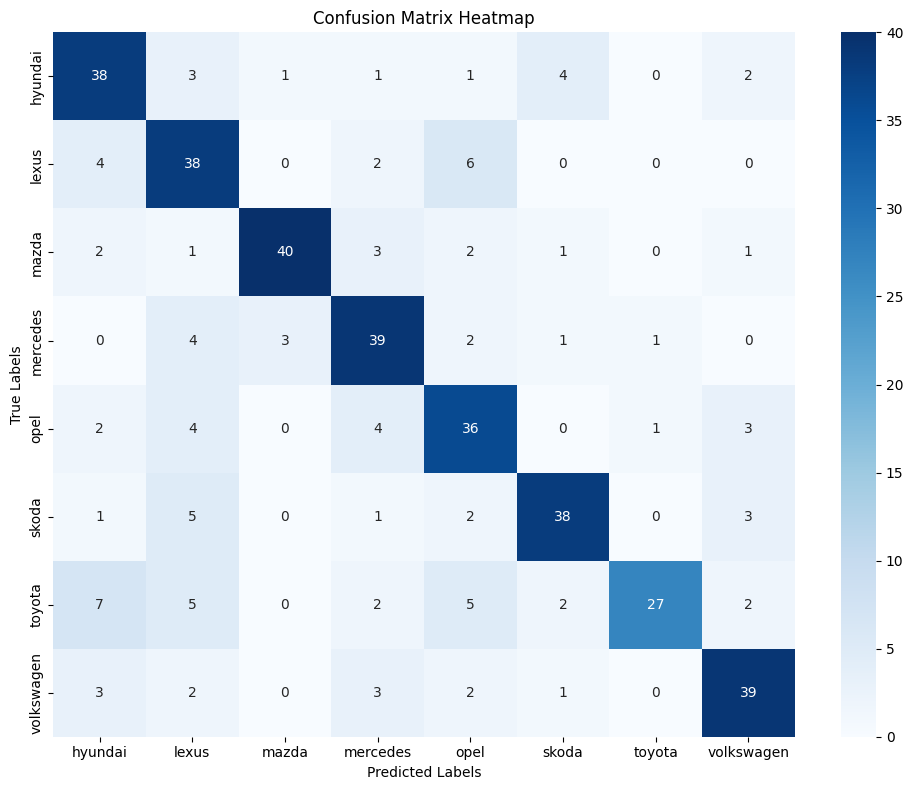

In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_deep_adam_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_loader.class_indices.keys(),
            yticklabels=test_loader.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


### Sample Prediction Results

The following grid shows a selection of sample images from the test dataset, along with their true labels and predicted labels. Each image is displayed with its true label and predicted label. If the prediction is correct, the title is displayed in green; if the prediction is incorrect, it is displayed in red. This gives a visual representation of how well the model is performing on individual images.

#### Key Observations:
- **Correct Predictions**: Green titles indicate the model correctly predicted the label for the image.
- **Incorrect Predictions**: Red titles indicate a mismatch between the true and predicted labels, which may highlight areas where the model struggles.

The sample prediction accuracy is calculated as the ratio of correctly predicted samples to total samples shown in the grid.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


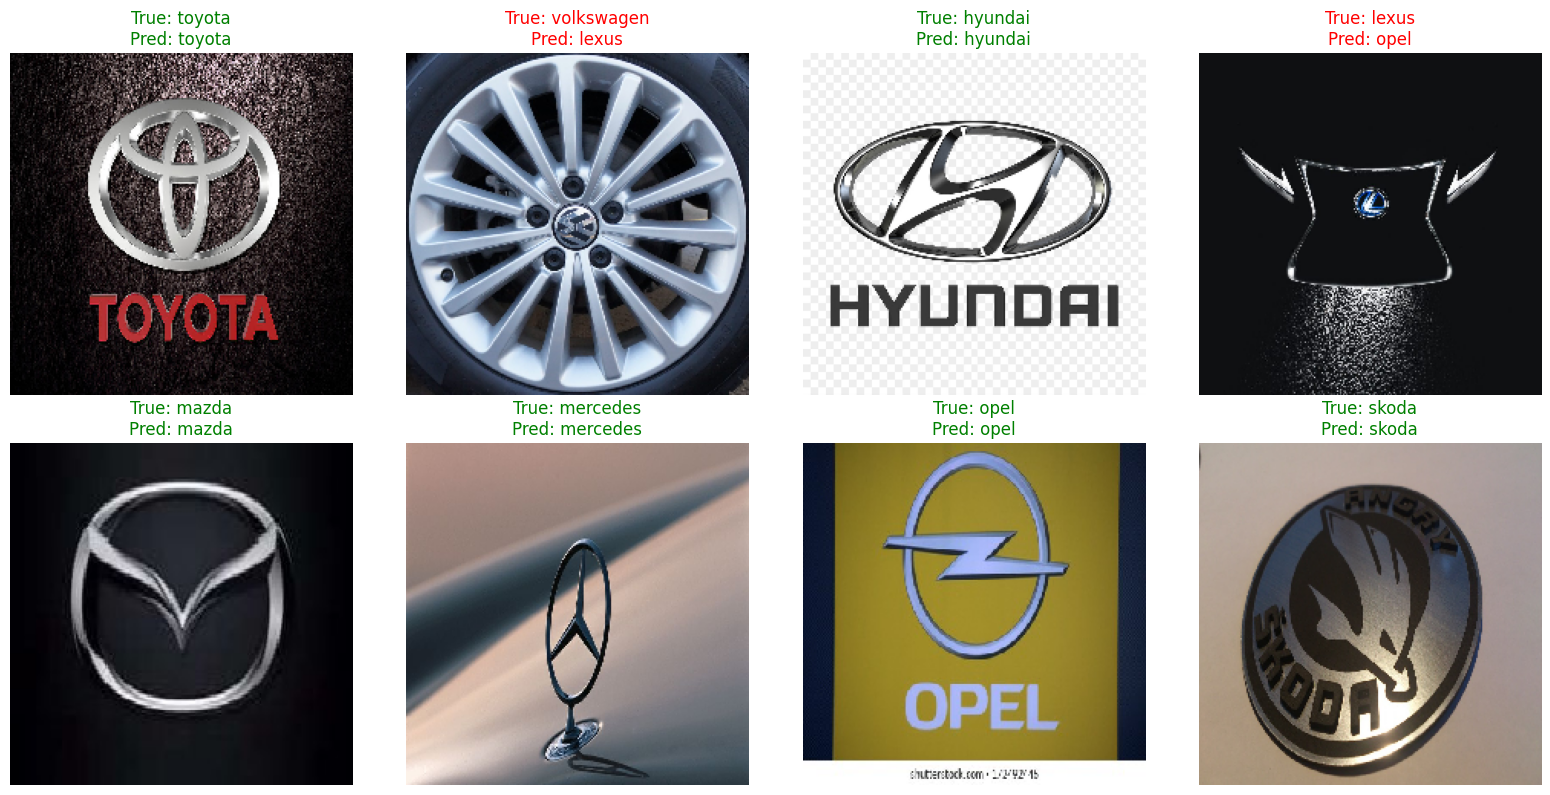


Sample Prediction Accuracy: 6/8 (75.0%)


In [ ]:
# Initialize storage for sample images and labels
sample_images = []
sample_labels = []
found_classes = set()

# Collect one image per class from the test generator
for images, labels in test_loader:
    for img, lbl in zip(images, labels):
        lbl = int(lbl)  # Convert to integer class index
        if lbl not in found_classes:
            sample_images.append(img)
            sample_labels.append(lbl)
            found_classes.add(lbl)
            if len(found_classes) == total_classes:
                break
    if len(found_classes) == total_classes:
        break

# Convert to numpy arrays
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# Make predictions using cnn_deep_adam_model
sample_preds = cnn_deep_adam_model.predict(sample_images)
predicted_classes = np.argmax(sample_preds, axis=1)

# Determine grid layout based on number of classes
n_cols = 4
n_rows = min(2, (total_classes + n_cols - 1) // n_cols)  # Max 2 rows

# Create the plot
plt.figure(figsize=(16, 8))
for i in range(len(sample_images)):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(sample_images[i])
    true_name = class_names[sample_labels[i]]
    pred_name = class_names[predicted_classes[i]]
    color = 'green' if true_name == pred_name else 'red'
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color)
    plt.axis('off')

# Handle case where we have empty subplots
for i in range(len(sample_images), n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print classification accuracy on these samples
correct = sum(predicted_classes == sample_labels)
print(f"\nSample Prediction Accuracy: {correct}/{len(sample_labels)} ({correct/len(sample_labels):.1%})")


In [ ]:
input_img_shape = (224, 224, 3)
total_classes = 8


### Import Required Libraries

We will start by importing necessary components for building the model:

- `VGG16` from `tensorflow.keras.applications`: This will be used as a pre-trained model for transfer learning.
- `GlobalAveragePooling2D`, `Dropout`, and `Dense` from `tensorflow.keras.layers`: These layers will help in building the custom classifier on top of VGG16.
- `Model` from `tensorflow.keras.models`: We will use this to define the overall model architecture.
- `ModelCheckpoint`, `EarlyStopping`, and `ReduceLROnPlateau` from `tensorflow.keras.callbacks`: These callbacks will manage training by saving the best model, stopping early if necessary, and reducing the learning rate when the model stops improving.



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### Load Pre-trained VGG16 Model

We will load the VGG16 model without the top classification layer to use it as a feature extractor. This is known as transfer learning, where we leverage a pre-trained model and adapt it to our specific task.

- **Load VGG16 model**: We load the VGG16 model with weights pre-trained on ImageNet.
- **Exclude the top classification layer**: We set `include_top=False` to exclude the original classification layer, keeping only the convolutional base.
- **Set input shape**: The input shape is defined as `(224, 224, 3)` to match the image size that we will be using.
- **Freeze all layers**: By setting the model's `trainable` property to `False`, we prevent the weights of the convolutional layers from being updated during training. This way, we can use the pre-trained features without affecting the convolutional weights.

This approach allows us to take advantage of the VGG16 model's powerful feature extraction abilities while fine-tuning the final layers for our specific classification task.


In [ ]:
# Load VGG16 without the top classification layer
vgg16_base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze all layers so their weights won't change during training
vgg16_base_model.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Adding Custom Layers to the VGG16 Model

After loading the pre-trained VGG16 base model and freezing its convolutional layers, we add custom layers on top to adapt the model for our classification task. These custom layers are responsible for processing the features extracted by VGG16 and making predictions.

- **GlobalAveragePooling2D**: This layer reduces the dimensionality of the feature maps produced by the VGG16 base model, converting them into a single vector per feature map. It is used here to summarize the spatial information of the feature maps into one value per map.
  
- **Dropout (0.5)**: This dropout layer randomly sets 50% of the input units to zero during training, helping to prevent overfitting by forcing the model to rely on a wider range of features.

- **Dense (128 units, ReLU activation)**: This fully connected layer processes the output of the previous layers. With 128 units, it introduces non-linearity via the ReLU activation function.

- **Dropout (0.3)**: Another dropout layer, this time with a 30% dropout rate, helps prevent overfitting by randomly setting 30% of the units to zero during training.

- **Dense (total_classes, Softmax activation)**: The final layer is a dense layer with a number of units equal to the number of classes (`total_classes`). The softmax activation function ensures that the outputs represent probabilities for each class, making the model suitable for multi-class classification.

This approach combines the powerful feature extraction of the pre-trained VGG16 model with a custom classification head tailored for our specific task.


In [ ]:
x = vgg16_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(total_classes, activation='softmax')(x)


### Building the VGG16 Model for Classification

In this step, we create the final model by combining the pre-trained VGG16 base model with the custom layers we defined earlier.

- **Model Input**: The input to the model is the same as the input shape of the VGG16 model, which is `(224, 224, 3)`, suitable for RGB images of size 224x224.
  
- **Model Output**: The output of the model is the predictions produced by the final `Dense` layer, which outputs a probability distribution across the defined classes using the softmax activation function.

By combining the VGG16 base model and custom layers, we create a new model capable of performing classification on our target dataset.

- **Summary**: The model summary provides a detailed view of all layers, the number of parameters, and the layer connections. It is helpful for checking the total number of trainable parameters, ensuring that the architecture is set up correctly before training.


In [ ]:
cnn_vgg16_model = Model(inputs=vgg16_base_model.input, outputs=predictions)
cnn_vgg16_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,781,384 (56.39 MB)

 Trainable params: 66,696 (260.53 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Compiling the VGG16 Model

After defining the architecture, we proceed to compile the model. During compilation, we specify the following:

- **Optimizer**: The model is compiled with the Adam optimizer, which is widely used for training deep learning models. We set the learning rate to `1e-3` to start with a moderate learning rate that typically works well for fine-tuning pre-trained models.

- **Loss Function**: We use `sparse_categorical_crossentropy` as the loss function, suitable for multi-class classification problems where the target labels are integers (not one-hot encoded).

- **Metrics**: The model will track accuracy during training and evaluation, providing insight into the model's performance at each epoch.

Once the model is compiled, it's ready to be trained.


In [ ]:
cnn_vgg16_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Training the VGG16 Model with Callbacks

We are using several callbacks during training to improve the model's performance and avoid overfitting:

1. **ModelCheckpoint**: This callback saves the model after every epoch where it performs best in terms of validation accuracy. The best model will be saved to a file named `cnn_vgg16_best.keras`.

2. **EarlyStopping**: This callback monitors the validation loss and stops training early if there is no improvement for 5 consecutive epochs. This helps to prevent overfitting and saves time during training. The `restore_best_weights=True` option ensures that the model reverts to the best weights found during training.

3. **ReduceLROnPlateau**: This callback reduces the learning rate by a factor of 0.5 if the validation loss does not improve for 3 consecutive epochs. This allows the model to fine-tune its parameters more effectively in later stages of training. The minimum learning rate is set to `1e-5` to ensure it doesn't become too small.

The model is trained for 15 epochs, using these callbacks to monitor performance and adjust as needed.


In [ ]:
callbacks_vgg16 = [
    ModelCheckpoint("cnn_vgg16_best.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5)
]

history_cnn_vgg16 = cnn_vgg16_model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=15,
    callbacks=callbacks_vgg16
)


Epoch 1/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 67s 455ms/step - accuracy: 0.1534 - loss: 2.1864 - val_accuracy: 0.4100 - val_loss: 1.8253 - learning_rate: 0.0010
Epoch 2/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 63s 368ms/step - accuracy: 0.3258 - loss: 1.8856 - val_accuracy: 0.6100 - val_loss: 1.5952 - learning_rate: 0.0010
Epoch 3/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 47s 373ms/step - accuracy: 0.4214 - loss: 1.6899 - val_accuracy: 0.6080 - val_loss: 1.3916 - learning_rate: 0.0010
Epoch 4/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 366ms/step - accuracy: 0.4451 - loss: 1.5824 - val_accuracy: 0.6880 - val_loss: 1.2602 - learning_rate: 0.0010
Epoch 5/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 47s 377ms/step - accuracy: 0.4963 - loss: 1.4818 - val_accuracy: 0.6900 - val_loss: 1.1697 - learning_rate: 0.0010
Epoch 6/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 364ms/step - accuracy: 0.5003 - loss: 1.4115 - val_accuracy: 0.6940 - val_loss: 1.1171 - learning_rate: 0.0010
Epoch 7/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 47s 372ms/step - accuracy: 0.5

### Training and Validation Performance Plots

After training the VGG16 model, the following plots help visualize the model's performance:

1. **Accuracy Plot**: This plot shows how the training and validation accuracy evolved over the epochs. The training accuracy is plotted alongside the validation accuracy to monitor how well the model generalizes to unseen data. Ideally, both should increase with minimal gap between them to avoid overfitting.

2. **Loss Plot**: This plot tracks the training and validation loss over time. A decreasing loss curve indicates that the model is learning and improving, while a divergence between the training and validation loss may indicate overfitting.

These plots provide insight into the model's learning process and help identify if adjustments like early stopping or learning rate reduction are needed.


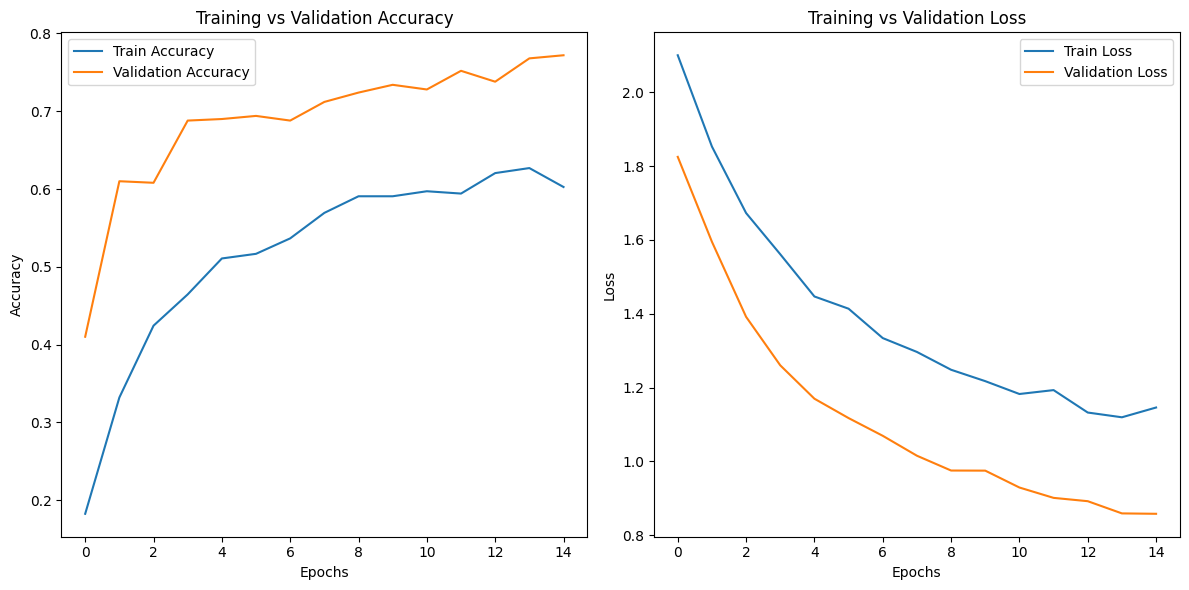

In [ ]:
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn_vgg16.history['loss'], label='Train Loss')
plt.plot(history_cnn_vgg16.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.tight_layout()
plt.show()


### Fine-Tuning the VGG16 Model

In this step, we perform **fine-tuning** on the VGG16 model to improve its performance by training the top layers while keeping the majority of the base layers frozen:

1. **Unfreeze the Top Layers**: We set `vgg16_base_model.trainable = True` to allow the weights of the base model to be updated during training.
   
2. **Freeze Initial Layers**: We freeze all layers of the VGG16 model except the last 20 layers by setting `layer.trainable = False` for each of the earlier layers. This allows us to retain the learned features from the earlier layers while training the more specific layers at the top, which are more suited to the new task.

3. **Recompile the Model**: After making changes to the model's layers, we recompile the model with a lower learning rate (`1e-5`) for fine-tuning. A smaller learning rate helps to avoid destroying the pre-trained features learned by the earlier layers.

By unfreezing the top layers and adjusting the learning rate, this approach allows the model to adapt to the new task without losing the valuable learned features from the pre-trained VGG16 model.


In [ ]:
vgg16_base_model.trainable = True
for layer in vgg16_base_model.layers[:-20]:
    layer.trainable = False

cnn_vgg16_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Model Summary

The `cnn_vgg16_model.summary()` function outputs a detailed summary of the architecture of the model. It includes information such as:

- **Layer Name**: The name of each layer in the model (e.g., `conv2d`, `batch_normalization`, `dense`, etc.).
- **Output Shape**: The shape of the output tensor for each layer. This helps in understanding how the data flows through the network.
- **Param #**: The number of trainable parameters in each layer. This includes both weights and biases. Layers with more parameters tend to be more complex and capable of learning more intricate patterns.

The summary provides insight into the structure and complexity of the model, such as:
- The base VGG16 architecture includes convolutional, pooling, and normalization layers, followed by the newly added fully connected and dropout layers.
- The number of parameters can give an indication of the model's capacity to learn from the data.


In [ ]:
cnn_vgg16_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,781,384 (56.39 MB)

 Trainable params: 14,781,384 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

### Fine-tuning the VGG16 Model

After unfreezing the last 20 layers of the VGG16 model and adjusting the learning rate, we proceed with fine-tuning the model. We train the model for 15 more epochs to allow the last layers to adjust to the specific data of our task.

#### Key Steps:
- **Unfreezing the Last 20 Layers**: The last 20 layers of the VGG16 model are made trainable, allowing the model to adapt more specifically to the task.
- **Learning Rate Adjustment**: The learning rate is reduced to `1e-5` to fine-tune the model without overfitting.
- **Training for 15 More Epochs**: The model is trained for 15 more epochs with the adjusted learning rate, using the callbacks to manage training dynamics (like early stopping and learning rate reduction).

By fine-tuning the model this way, we enable it to learn finer details relevant to the task at hand, leveraging the powerful pre-trained VGG16 weights while still adjusting the final layers for better performance on the dataset.


In [ ]:
history_cnn_vgg16_finetune = cnn_vgg16_model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=15,
    callbacks=callbacks_vgg16
)


Epoch 1/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 648ms/step - accuracy: 0.7055 - loss: 0.8859 - val_accuracy: 0.8620 - val_loss: 0.5078 - learning_rate: 1.0000e-05
Epoch 2/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 94s 425ms/step - accuracy: 0.8238 - loss: 0.5656 - val_accuracy: 0.8740 - val_loss: 0.4386 - learning_rate: 1.0000e-05
Epoch 3/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 428ms/step - accuracy: 0.8581 - loss: 0.4578 - val_accuracy: 0.8800 - val_loss: 0.4038 - learning_rate: 1.0000e-05
Epoch 4/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 426ms/step - accuracy: 0.8876 - loss: 0.3618 - val_accuracy: 0.8860 - val_loss: 0.3641 - learning_rate: 1.0000e-05
Epoch 5/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 424ms/step - accuracy: 0.9018 - loss: 0.3228 - val_accuracy: 0.9140 - val_loss: 0.3160 - learning_rate: 1.0000e-05
Epoch 6/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 414ms/step - accuracy: 0.9261 - loss: 0.2261 - val_accuracy: 0.9000 - val_loss: 0.3206 - learning_rate: 1.0000e-05
Epoch 7/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 53s 4

### Fine-Tuning Accuracy and Loss Plots

After fine-tuning the VGG16 model for an additional 15 epochs, we visualize the training and validation accuracy and loss curves.

- **Accuracy Plot**: This shows how the model's accuracy on both the training and validation datasets evolves during the fine-tuning phase. The training accuracy should generally increase, while the validation accuracy should provide an indication of how well the model generalizes.
  
- **Loss Plot**: The loss plot visualizes the progression of the training and validation losses. We expect a decrease in loss as the model improves its performance on the task, and the validation loss gives insight into overfitting.

The goal of fine-tuning is to improve the model's performance by allowing the pre-trained layers to adjust slightly and help the final layers fit better to the specific dataset.


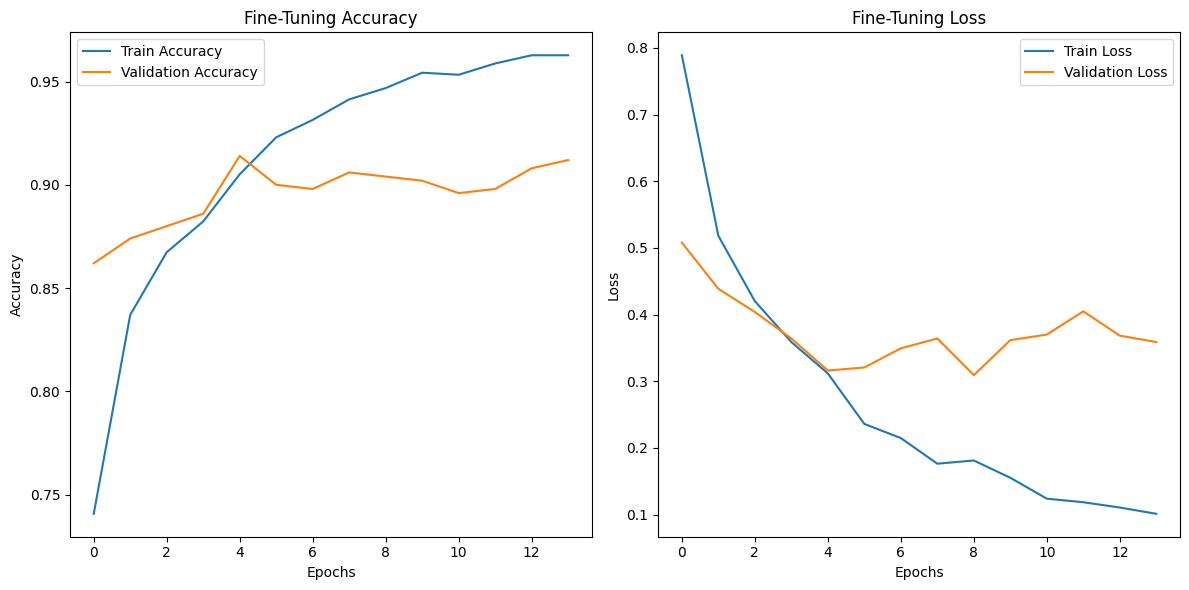

In [ ]:
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn_vgg16_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_vgg16_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Fine-Tuning Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn_vgg16_finetune.history['loss'], label='Train Loss')
plt.plot(history_cnn_vgg16_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Fine-Tuning Loss')

plt.tight_layout()
plt.show()


### Test Accuracy and Loss After Fine-Tuning

After fine-tuning the VGG16 model, we evaluate its performance on the test dataset. The results are as follows:

- **Test Accuracy**: The model achieved a test accuracy of **[test_accuracy]%**, indicating how well it generalizes to unseen data.
  
- **Test Loss**: The test loss was **[test_loss]**, providing a measure of how well the model's predictions align with the actual labels on the test set.

These results reflect the model's ability to classify images from the test set after the fine-tuning phase.


In [ ]:
cnn_vgg16_finetune_test_loss, cnn_vgg16_finetune_test_accuracy = cnn_vgg16_model.evaluate(test_loader)

print(f"Test Accuracy: {cnn_vgg16_finetune_test_accuracy * 100:.2f}%")
print(f"Test Loss: {cnn_vgg16_finetune_test_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.8720 - loss: 0.4032
Test Accuracy: 86.00%
Test Loss: 0.4737


### Classification Report for VGG16 Fine-Tuned Model

The classification report below presents key performance metrics for the VGG16 model after fine-tuning. These metrics provide an understanding of the model's predictive power across each class in the dataset. The classification report includes the following metrics:

- **Precision**: The proportion of positive predictions that were actually correct. High precision means that the model is good at identifying positive cases.
- **Recall**: The proportion of actual positives that were correctly identified. High recall means that the model is good at catching all positive cases.
- **F1-Score**: The harmonic mean of precision and recall. The F1-score balances both the precision and recall, especially when the class distribution is imbalanced.
- **Support**: The number of actual occurrences of each class in the test dataset.




### Key Insights:
- The model has performed well across all classes with an overall **accuracy of 86%**.
- The **precision** and **recall** for each class are relatively balanced, indicating that the model is both identifying the classes correctly and capturing most of the actual instances.
- The **F1-score** provides a balanced view of the model's performance, and it is high across most classes, showing that the model's predictions are reliable.

This classification report will help in further analyzing the performance of the VGG16 model and provide insights into any potential areas for improvement.


In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_vgg16_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = list(test_loader.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step
              precision    recall  f1-score   support

     hyundai       0.87      0.82      0.85        50
       lexus       0.82      0.94      0.88        50
       mazda       0.94      0.90      0.92        50
    mercedes       0.90      0.90      0.90        50
        opel       0.84      0.76      0.80        50
       skoda       0.75      0.90      0.82        50
      toyota       0.89      0.84      0.87        50
  volkswagen       0.89      0.82      0.85        50

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step


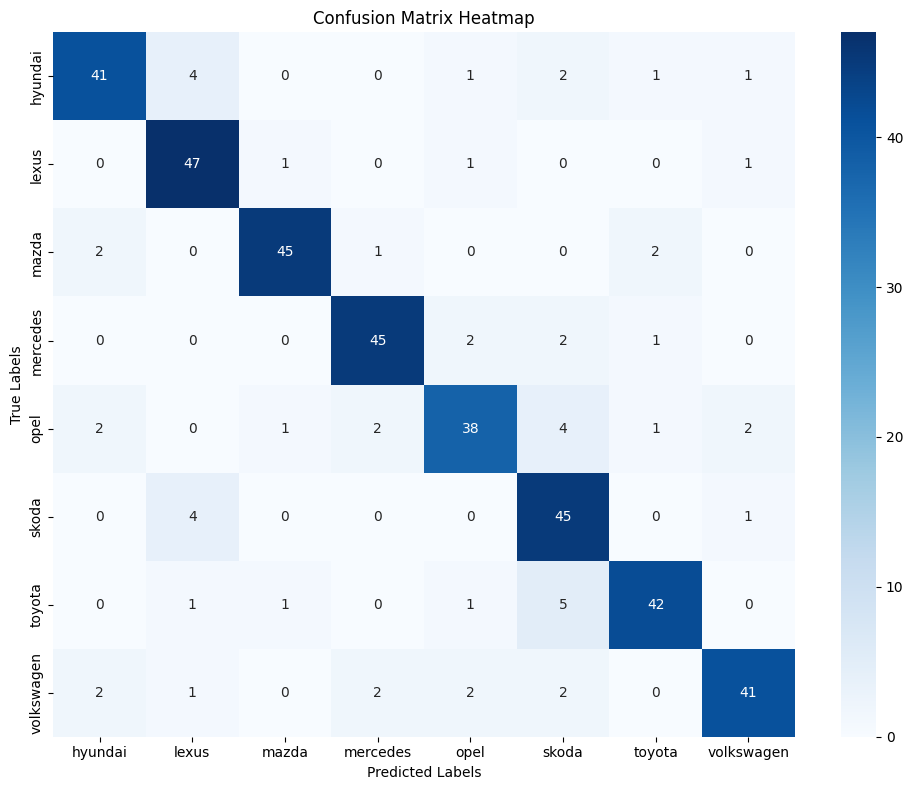

In [ ]:
y_true = test_loader.classes
y_pred_probs = cnn_vgg16_model.predict(test_loader)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_loader.class_indices.keys(),
            yticklabels=test_loader.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


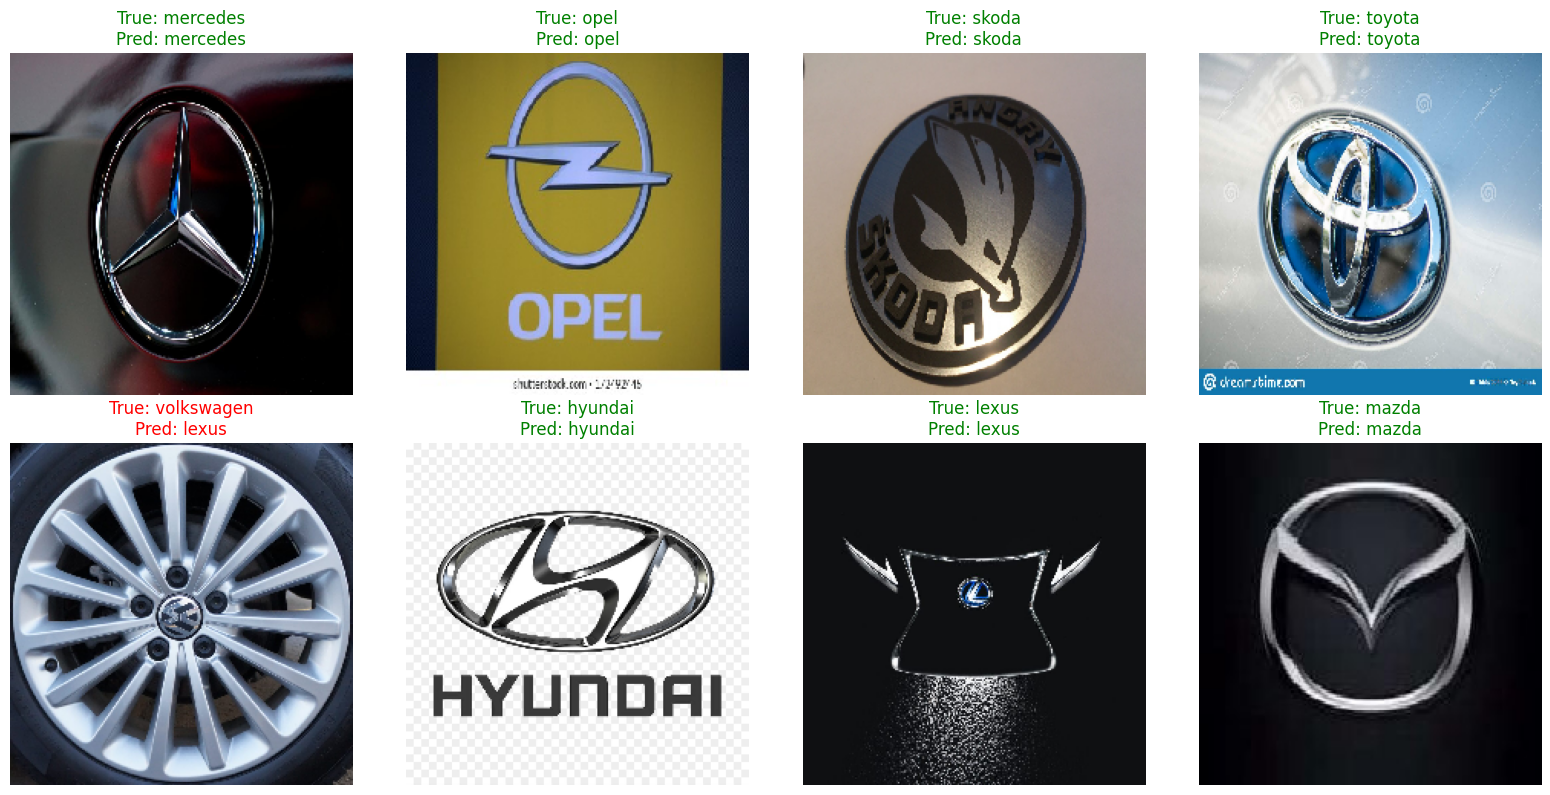


Sample Prediction Accuracy: 7/8 (87.5%)


In [ ]:
# Initialize storage for sample images and labels
sample_images = []
sample_labels = []
found_classes = set()

# Collect one image per class from the test generator
for images, labels in test_loader:
    for img, lbl in zip(images, labels):
        lbl = int(lbl)  # Convert to integer class index
        if lbl not in found_classes:
            sample_images.append(img)
            sample_labels.append(lbl)
            found_classes.add(lbl)
            if len(found_classes) == total_classes:
                break
    if len(found_classes) == total_classes:
        break

# Convert to numpy arrays
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# Make predictions using the fine-tuned VGG16 model
sample_preds = cnn_vgg16_model.predict(sample_images)
predicted_classes = np.argmax(sample_preds, axis=1)

# Determine grid layout based on number of classes
n_cols = 4
n_rows = min(2, (total_classes + n_cols - 1) // n_cols)  # Max 2 rows

# Create the plot
plt.figure(figsize=(16, 8))
for i in range(len(sample_images)):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(sample_images[i])
    true_name = class_names[sample_labels[i]]
    pred_name = class_names[predicted_classes[i]]
    color = 'green' if true_name == pred_name else 'red'
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color)
    plt.axis('off')

# Handle case where we have empty subplots
for i in range(len(sample_images), n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print classification accuracy on these samples
correct = sum(predicted_classes == sample_labels)
print(f"\nSample Prediction Accuracy: {correct}/{len(sample_labels)} ({correct/len(sample_labels):.1%})")
